###    IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sms
import seaborn as sns
from scipy import stats
sns.set()
import warnings
from sklearn import metrics
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split 
from statsmodels.stats.stattools import durbin_watson 
import statsmodels.formula.api as smf

#### IMPORTING CSV FILE ( DATASET)


In [2]:
data_before_clean = pd.read_csv('housing.csv')
print(f'Dataset contains {data_before_clean.shape[0]} rows')
print(f'Dataset contains {data_before_clean.shape[1]} columns')

Dataset contains 2413 rows
Dataset contains 18 columns


## Exploratory Data Analysis (EDA)

Initial phase where we get to know all the useful information of raw data

In [3]:
data_before_clean.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

# Summary : Types of variables:

Lot_Frontage - Continuous

Lot_Area - Continuous

Bldg_Type - Categorical

House_Style	- Categorical

Overall_Cond - Categorical and ordinal

Year_Built - Discrete

Exter_Cond - Categorical and ordinal

Total_Bsmt_SF - Continuous

First_Flr_SF - Continuous

Second_Flr_SF - Continuous

Full_Bath - Discrete

Half_Bath - Discrete

Bedroom_AbvGr - Discrete

Kitchen_AbvGr - Discrete

Fireplaces - Discrete

Longitude - Continuous

Latitude - Continuous

Sale_Price - Continuous and Dependent


#### To find null values from our dataset 

In [4]:
data_before_clean.isnull().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

So, we don't have any null values present in our dataset

In [5]:
# To know about the datatypes of all the variables: 
data_before_clean.dtypes

Lot_Frontage       int64
Lot_Area           int64
Bldg_Type         object
House_Style       object
Overall_Cond      object
Year_Built         int64
Exter_Cond        object
Total_Bsmt_SF      int64
First_Flr_SF       int64
Second_Flr_SF      int64
Full_Bath          int64
Half_Bath          int64
Bedroom_AbvGr      int64
Kitchen_AbvGr      int64
Fireplaces         int64
Longitude        float64
Latitude         float64
Sale_Price         int64
dtype: object

#### Getting all unique columns present in Categorical variables with their values:

In [6]:
categorical_Cols = [data for data in data_before_clean.columns if data_before_clean[data].dtype == 'object']
print(f'Categorical Columns contains: {categorical_Cols}')

Categorical Columns contains: ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']


In [7]:
for features in categorical_Cols:
    print(features,data_before_clean[features].unique())

Bldg_Type ['OneFam' 'TwnhsE' 'Twnhs' 'Duplex' 'TwoFmCon']
House_Style ['One_Story' 'Two_Story' 'One_and_Half_Fin' 'SLvl' 'SFoyer'
 'Two_and_Half_Unf' 'One_and_Half_Unf' 'Two_and_Half_Fin']
Overall_Cond ['Average' 'Above_Average' 'Good' 'Very_Good' 'Poor' 'Below_Average'
 'Excellent' 'Fair' 'Very_Poor']
Exter_Cond ['Typical' 'Good' 'Fair' 'Poor' 'Excellent']


#### Getting all unique columns present in Numerical variables

In [8]:
numerical_cols = [data for data in data_before_clean.columns if data_before_clean[data].dtype == 'int64' or data_before_clean[data].dtype == 'float64']
print(f'Numerical Columns contains: {numerical_cols}')

Numerical Columns contains: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


### Transforming Categorical and Ordinal values into numeric using label encoding

In [9]:
data_after_EDA = data_before_clean.copy()

In [10]:
data_after_EDA.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

In [11]:
# Creating a dictionary 'ext_Label' that maps the labels to the values
ext_Label = {'Poor': 0, 'Fair': 1, 'Typical': 2, 'Good': 3, 'Excellent': 4}

# Mapping the labels to the values from the given dictionary
data_after_EDA['Exter_Cond'] = data_before_clean['Exter_Cond'].map(ext_Label)

In [12]:
data_after_EDA['Exter_Cond'].value_counts()

2    2081
3     266
1      53
4      11
0       2
Name: Exter_Cond, dtype: int64

In [13]:
#bldg_Label = {'Duplex':0,'TwoFmCon':1, 'Twnhs':2, 'TwnhsE':3, 'OneFam':4   }
#data_after_EDA['Bldg_Type'] = data_before_clean['Bldg_Type'].map(label_dict_b)

In [14]:
# data_after_EDA['Bldg_Type'].value_counts()

In [15]:
#house_style_Label = {'One_and_Half_Unf':0, 'Two_and_Half_Unf':1, 'One_and_Half_Fin':2, 'Two_and_Half_Fin':3, 'One_Story':4,  'SLvl':5, 'SFoyer':6, 'Two_Story':7}

#data_after_EDA['House_Style'] = data_before_clean['House_Style'].map(label_dict_h)

In [16]:
over_cond_Label = {'Very_Poor': 0, 'Poor': 1, 'Below_Average': 2, 'Fair': 3,'Average': 4, 'Above_Average': 5, 'Good': 6, 'Very_Good': 7,  'Excellent': 8}

data_after_EDA['Overall_Cond'] = data_before_clean['Overall_Cond'].map(over_cond_Label)

In [17]:
data_after_EDA['Overall_Cond'].value_counts()

4    1282
5     474
6     352
7     139
2      82
8      39
3      36
1       6
0       3
Name: Overall_Cond, dtype: int64

In [18]:
data_after_EDA.describe()

Lot_Frontage       Lot_Area  Overall_Cond   Year_Built   Exter_Cond  \
count   2413.000000    2413.000000   2413.000000  2413.000000  2413.000000   
mean      55.462495   10060.208040      4.630336  1969.436386     2.095731   
std       33.542416    8222.759854      1.163332    29.487943     0.380323   
min        0.000000    1300.000000      0.000000  1872.000000     0.000000   
25%       37.000000    7390.000000      4.000000  1953.000000     2.000000   
50%       60.000000    9360.000000      4.000000  1971.000000     2.000000   
75%       77.000000   11404.000000      5.000000  1998.000000     2.000000   
max      313.000000  215245.000000      8.000000  2010.000000     4.000000   

       Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF    Full_Bath    Half_Bath  \
count    2413.000000   2413.000000    2413.000000  2413.000000  2413.000000   
mean     1022.827600   1133.857024     339.242851     1.539163     0.377953   
std       408.977848    366.442470     423.198488     0.544667     0.498467   
min         0.000000    334.000000       0.000000     0.000000     0.000000   
25%       784.000000    866.000000       0.000000     1.000000     0.000000   
50%       970.000000   1060.000000       0.000000     2.000000     0.000000   
75%      1246.000000   1350.000000     704.000000     2.000000     1.000000   
max      3206.000000   3820.000000    1872.000000     4.000000     2.000000   

       Bedroom_AbvGr  Kitchen_AbvGr   Fireplaces    Longitude     Latitude  \
count    2413.000000    2413.000000  2413.000000  2413.000000  2413.000000   
mean        2.854538       1.040199     0.602984   -93.642391    42.033730   
std         0.813430       0.200642     0.648911     0.026159     0.018015   
min         0.000000       0.000000     0.000000   -93.693153    41.986498   
25%         2.000000       1.000000     0.000000   -93.661562    42.021547   
50%         3.000000       1.000000     1.000000   -93.640326    42.034569   
75%         3.000000       1.000000     1.000000   -93.621485    42.047997   
max         6.000000       3.000000     4.000000   -93.577427    42.063381   

          Sale_Price  
count    2413.000000  
mean   175567.643183  
std     70979.614441  
min     35000.000000  
25%    129500.000000  
50%    159000.000000  
75%    206900.000000  
max    755000.000000

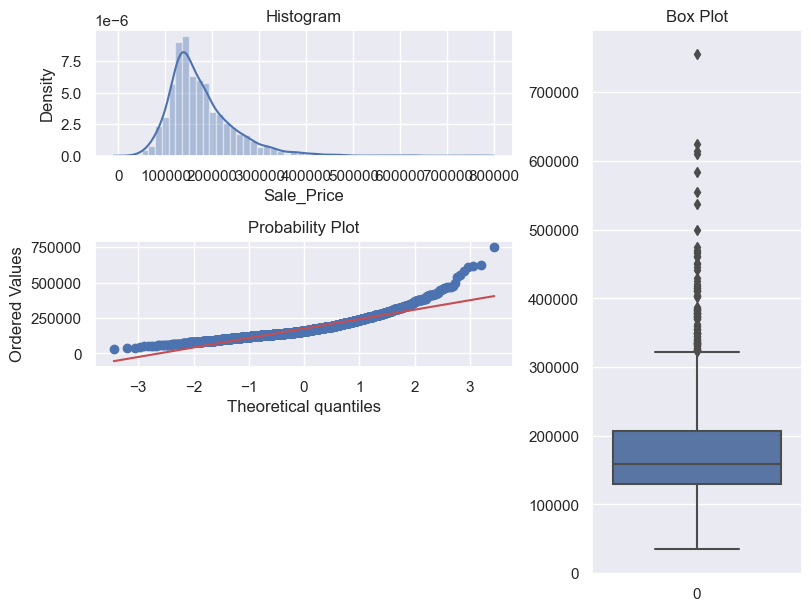

In [19]:
def plotting_sub_chart(df, feature):
      ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(8,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_sub_chart(data_after_EDA, 'Sale_Price')

In [20]:
Sale_price_Skewness = stats.skew(data_before_clean['Sale_Price'])
print(f'The Skewness of Sale Price with unclean data is: {Sale_price_Skewness}' )

The Skewness of Sale Price with unclean data is: 1.7442728887821093


Here, the skewness of the distribution is > 1, which is positive 
and has a long tail to the right, so it’s highly right- skewed

In [21]:
Sale_price_kurtosis = stats.kurtosis(data_before_clean['Sale_Price'])
print(f'The Kurtosis of Sale Price with unclean data is: {Sale_price_kurtosis}' )

The Kurtosis of Sale Price with unclean data is: 5.811213630343877


## Examine relation of Categorical variable with Sale Price which is our Target variable

In [22]:
# make function for box plot and scatter plots for Categorical features

def Categorical_Plot(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(data_after_EDA[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = data_after_EDA[column], y = data_after_EDA.Sale_Price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)
        plt.show()
        print()

In [23]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(data_after_EDA[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=data_after_EDA[column],y=data_after_EDA["Sale_Price"],hue=data_after_EDA[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()
        

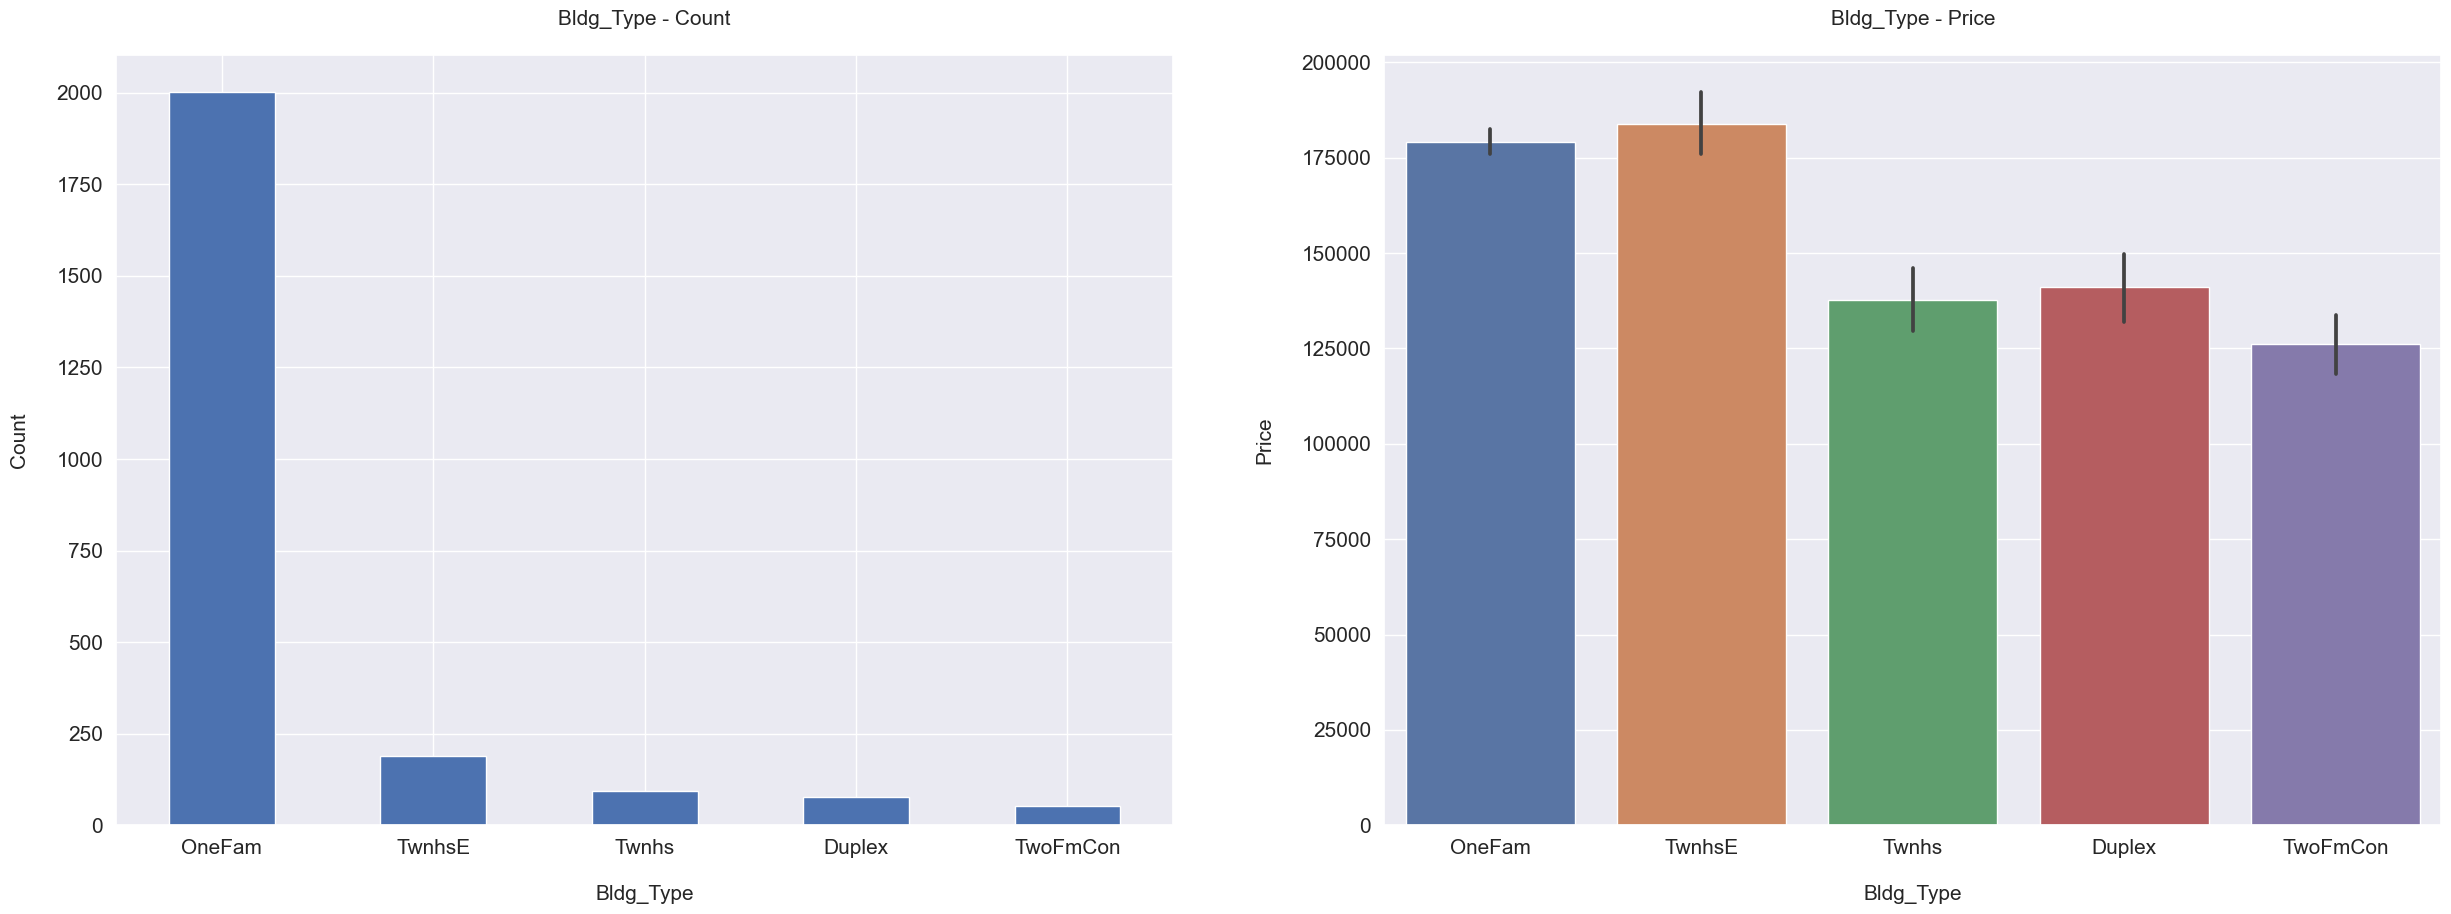

In [24]:
Categorical_Plot("Bldg_Type")


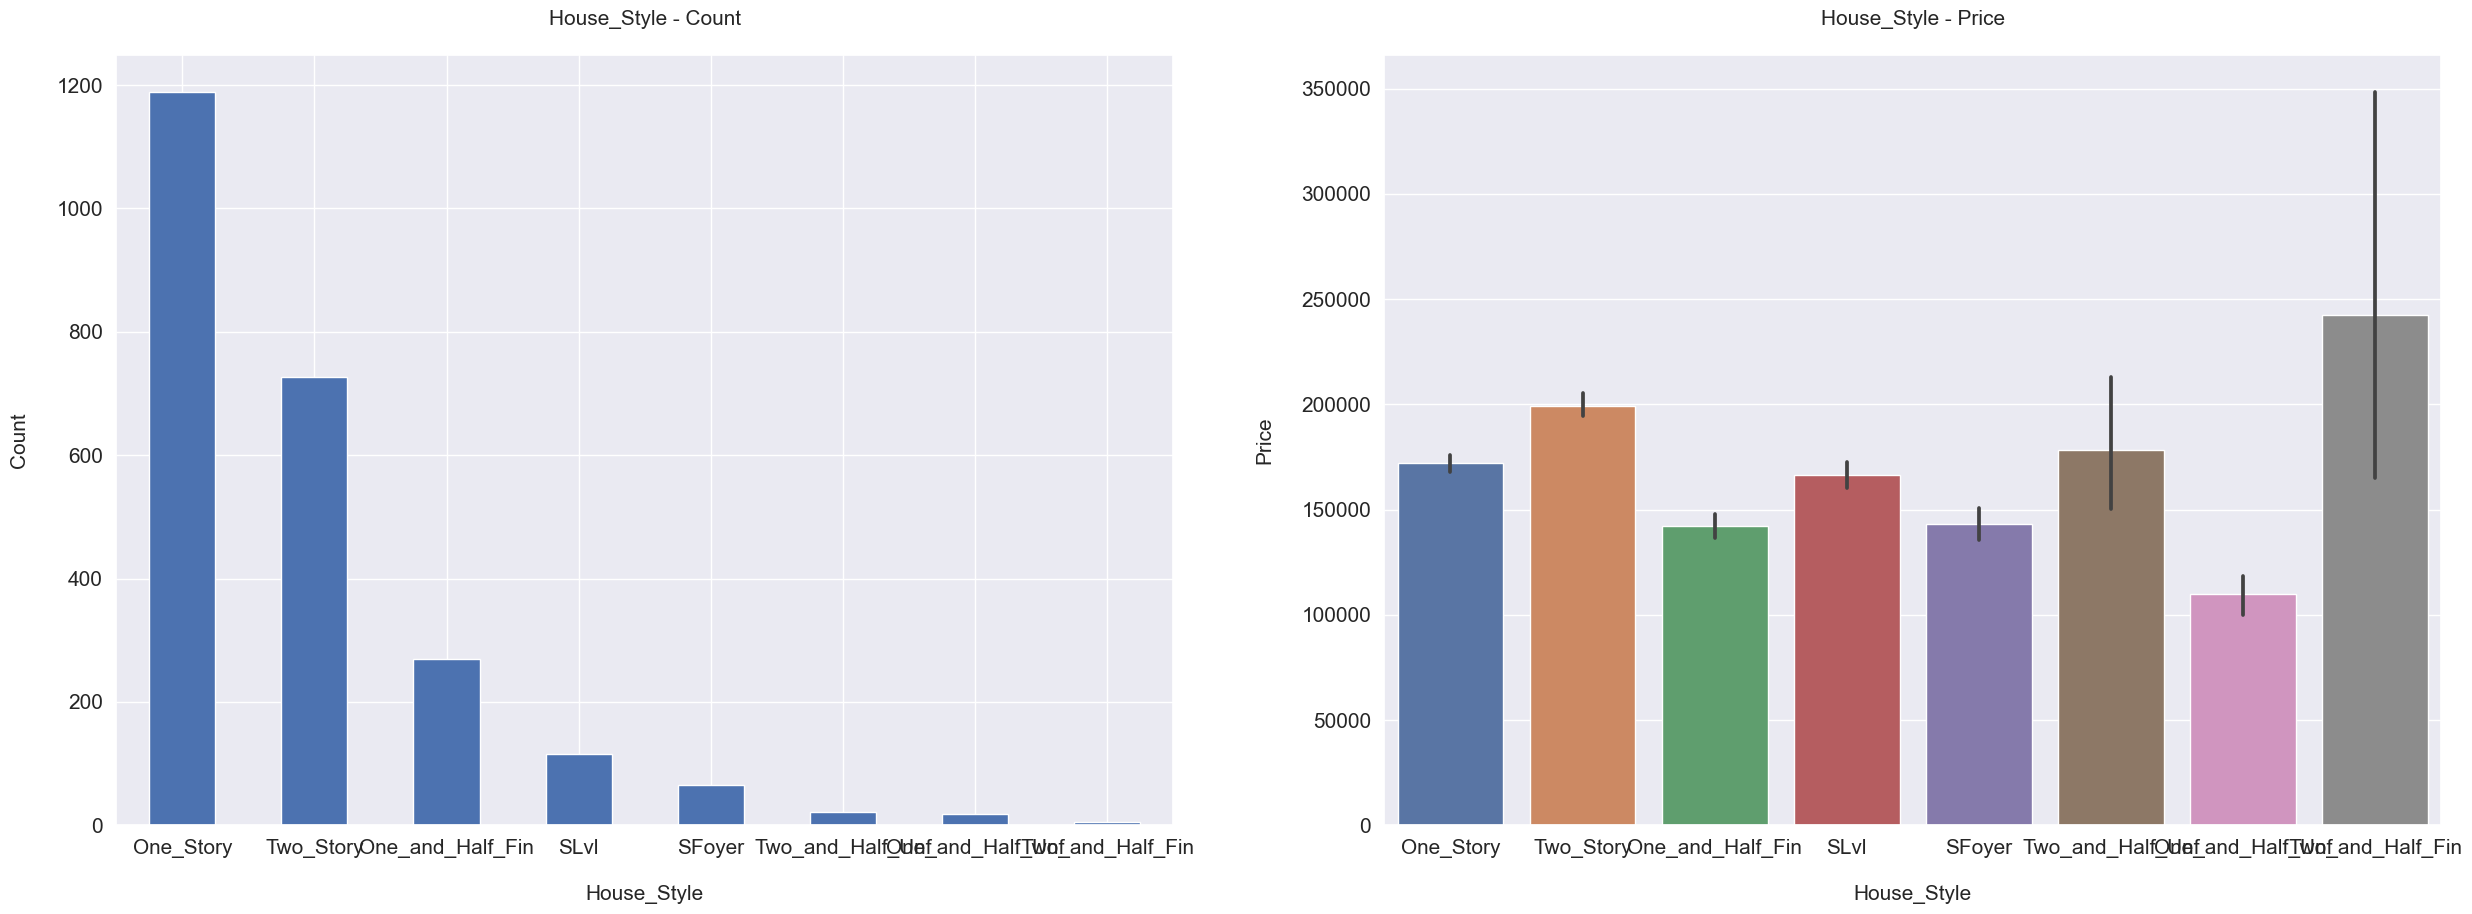

In [25]:
Categorical_Plot("House_Style")

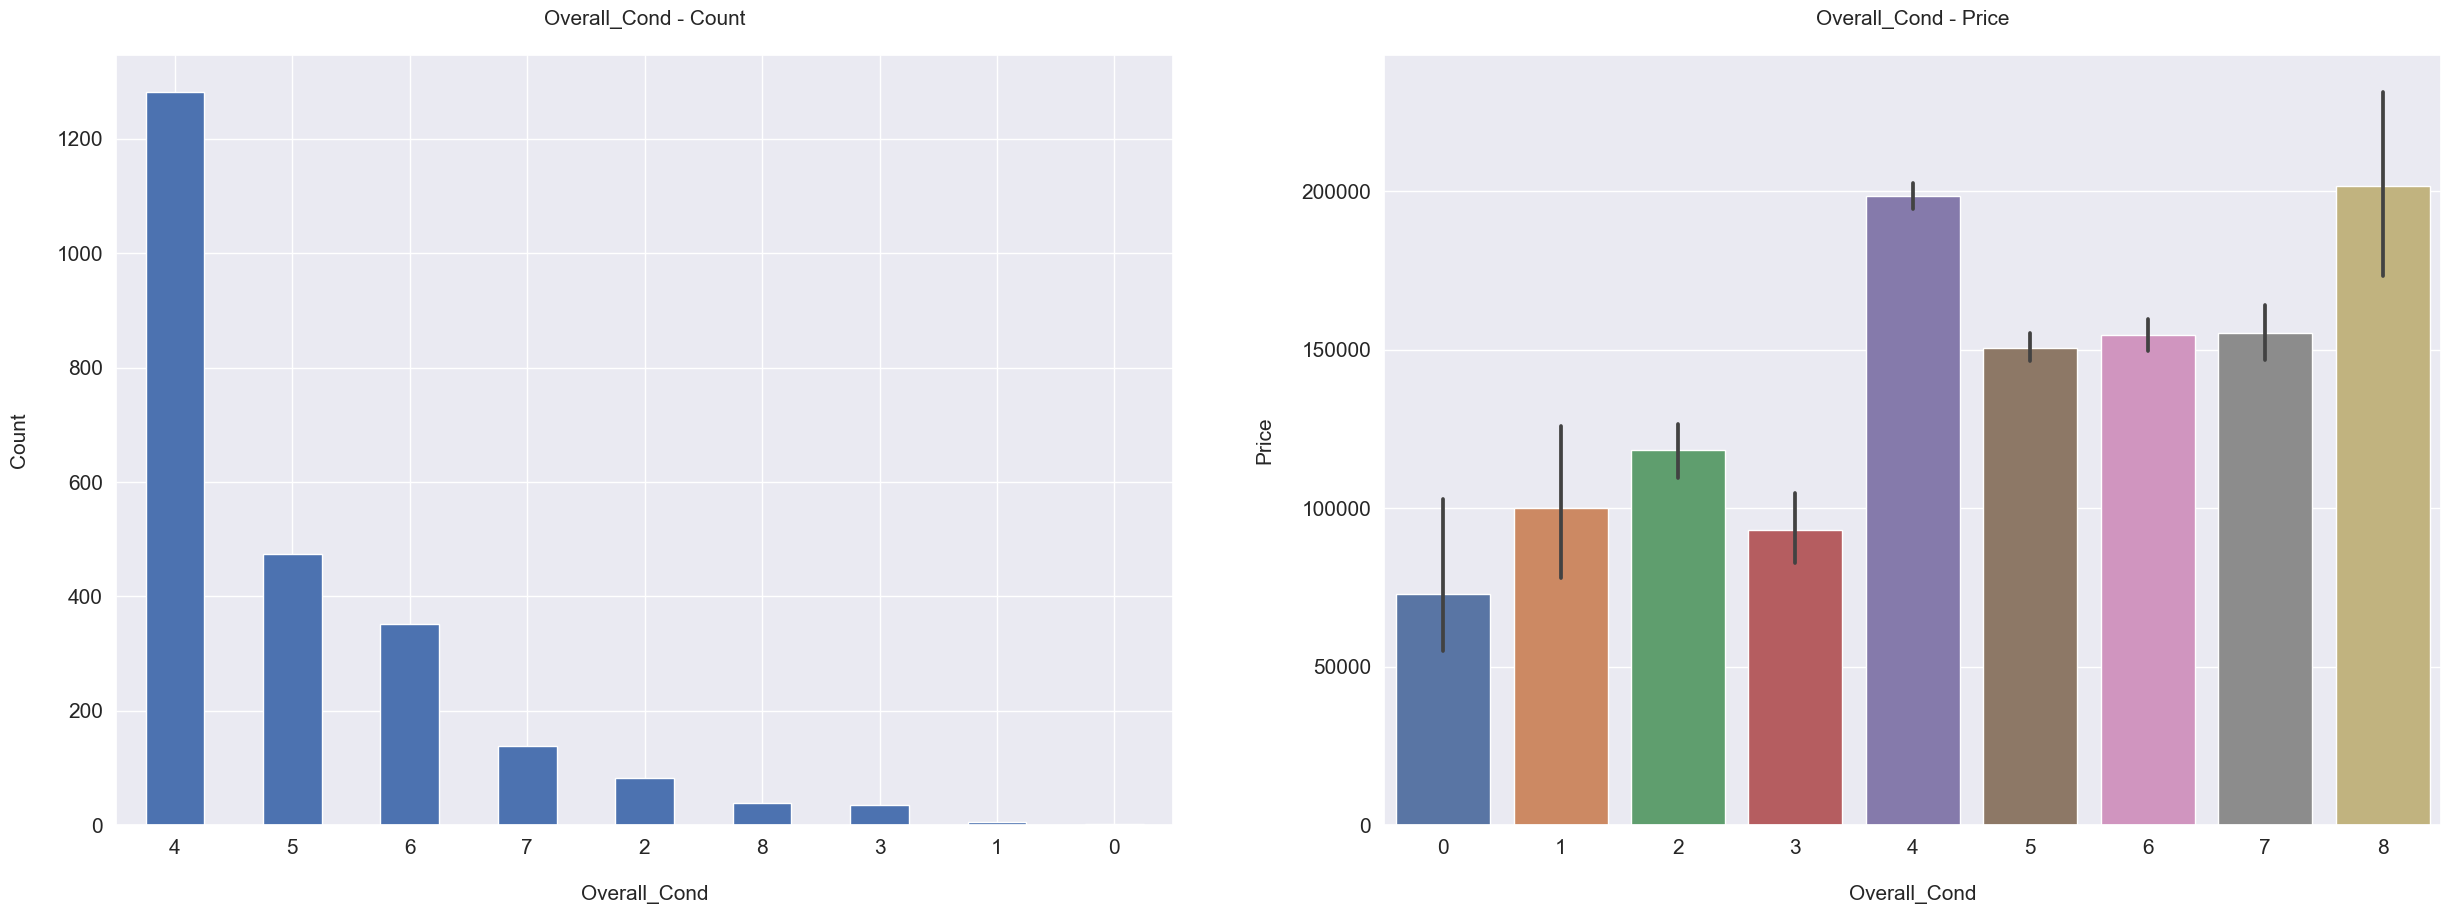

In [26]:
Categorical_Plot("Overall_Cond")

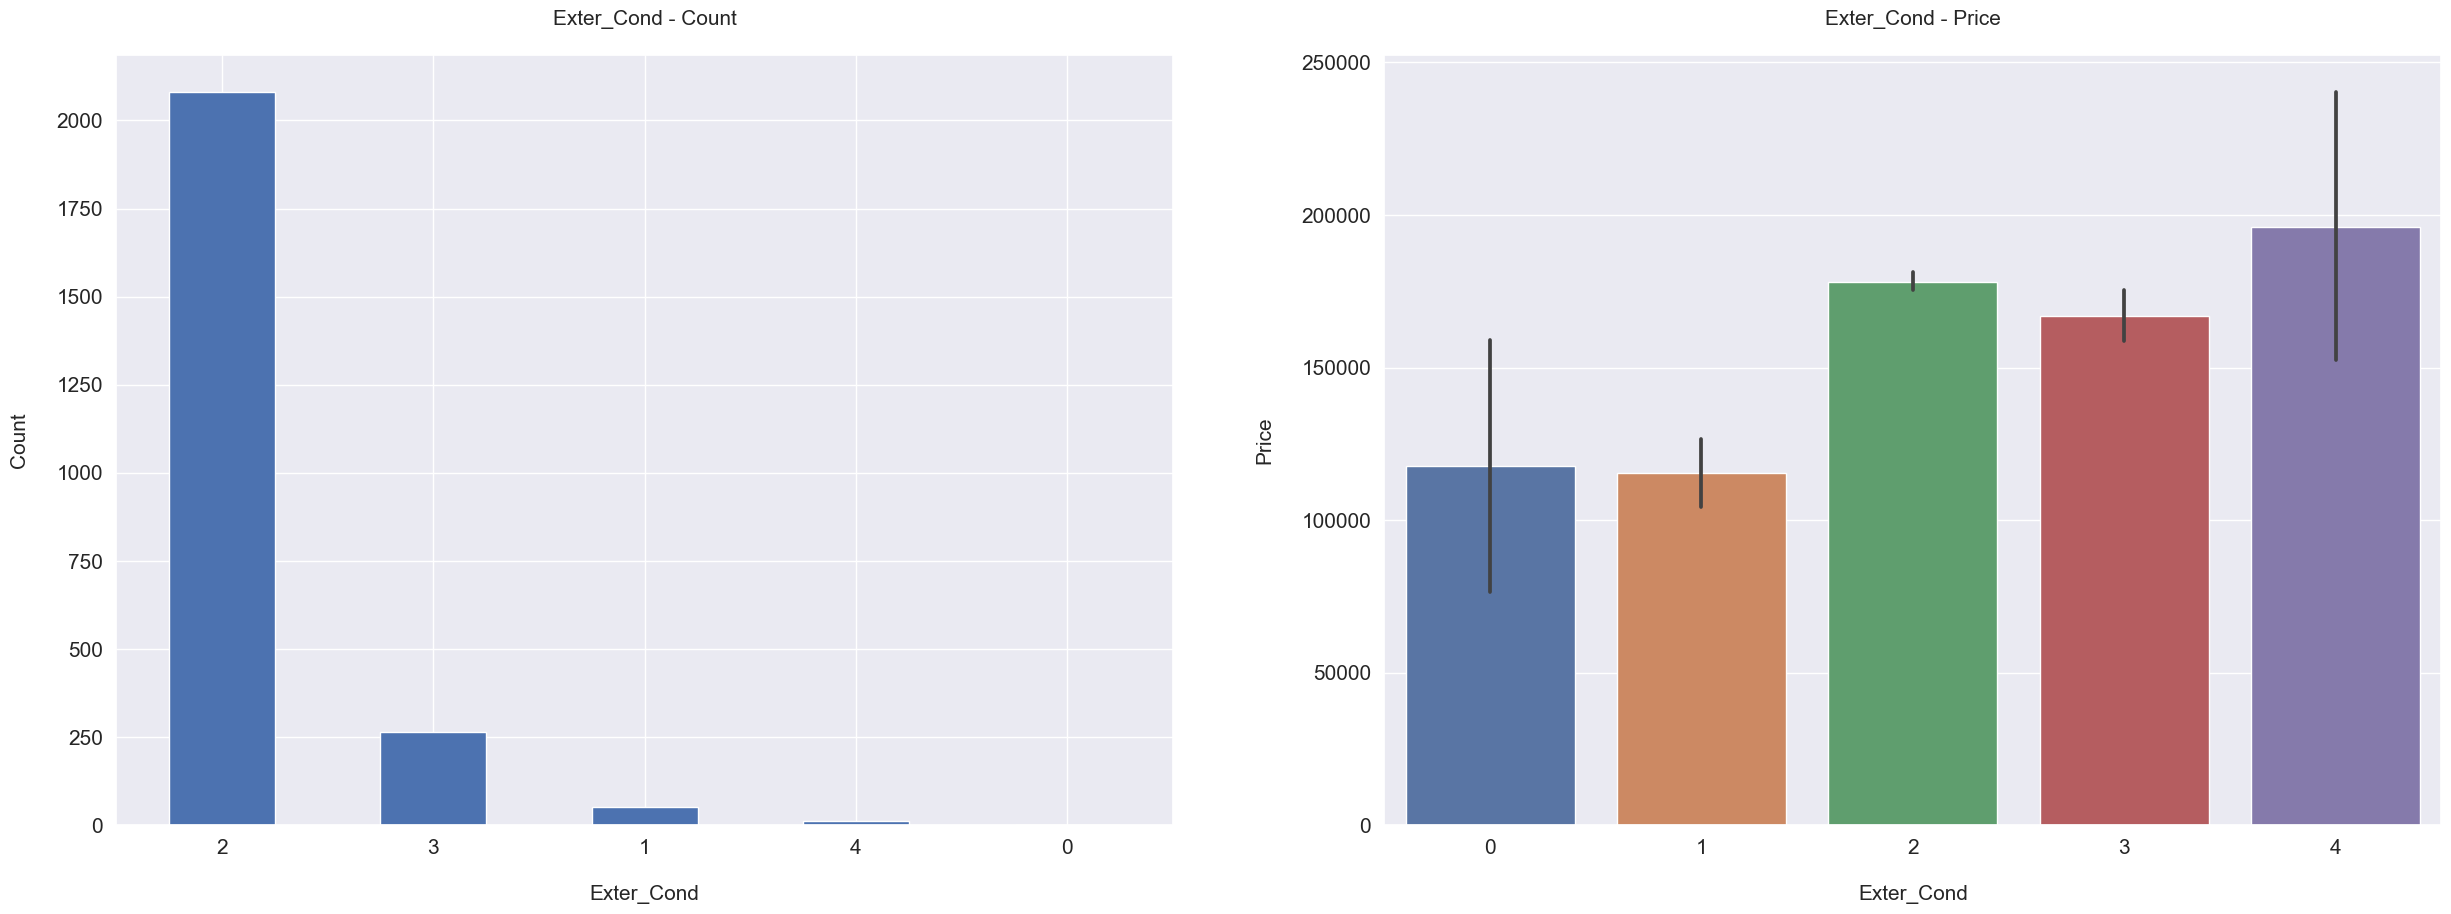

In [27]:
Categorical_Plot("Exter_Cond")

## Finding relation between Continuous numerical data with respect to Sale Price

In [28]:
data_after_EDA.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style  Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story             4        1960   
1            80     11622    OneFam   One_Story             5        1961   
2            81     14267    OneFam   One_Story             5        1958   
3            93     11160    OneFam   One_Story             4        1968   
4            74     13830    OneFam   Two_Story             4        1997   

   Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0           2           1080          1656              0          1   
1           2            882           896              0          1   
2           2           1329          1329              0          1   
3           2           2110          2110              0          2   
4           2            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

# Merging the Basement, First floor and Second floor surface areas


Here we aggregate all the values of columns such as 'Total_Bsmt_SF' , 'First_Flr_SF' , 'Second_Flr_SF' and appending it to by creating new column 'Total_SF'. 

In [29]:
data_after_EDA['Total_SF'] = data_after_EDA['Total_Bsmt_SF'] + data_after_EDA['First_Flr_SF'] + data_after_EDA['Second_Flr_SF']
data_after_EDA.drop(['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF'], axis = 1, inplace = True)

data_after_EDA.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style  Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story             4        1960   
1            80     11622    OneFam   One_Story             5        1961   
2            81     14267    OneFam   One_Story             5        1958   
3            93     11160    OneFam   One_Story             4        1968   
4            74     13830    OneFam   Two_Story             4        1997   

   Exter_Cond  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  \
0           2          1          0              3              1           2   
1           2          1          0              2              1           0   
2           2          1          1              3              1           0   
3           2          2          1              3              1           2   
4           2          2          1              3              1           1   

   Longitude   Latitude  Sale_Price  Total_SF  
0 -93.619754  42.054035      215000      2736  
1 -93.619756  42.053014      105000      1778  
2 -93.619387  42.052659      172000      2658  
3 -93.617320  42.051245      244000      4220  
4 -93.638933  42.060899      189900      2557

In [30]:
Conti_Features = ['Lot_Frontage', 'Lot_Area', 'Total_SF', 'Longitude', 'Latitude', 'Sale_Price']
Conti_Features


['Lot_Frontage', 'Lot_Area', 'Total_SF', 'Longitude', 'Latitude', 'Sale_Price']

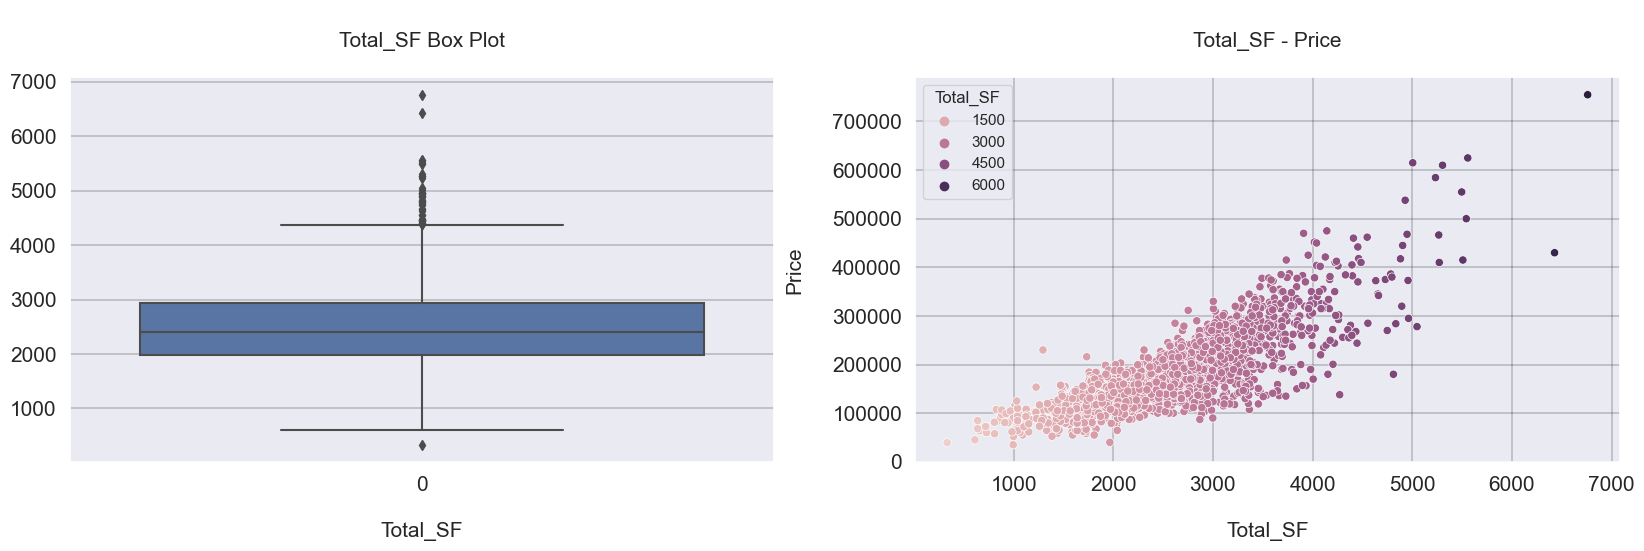


Skewness of Total SF: 0.74804272268268 


In [31]:
Numerical_Plot("Total_SF")
skewness_Total_SF = stats.skew(data_after_EDA["Total_SF"])
print(f'Skewness of Total SF: {skewness_Total_SF} ')

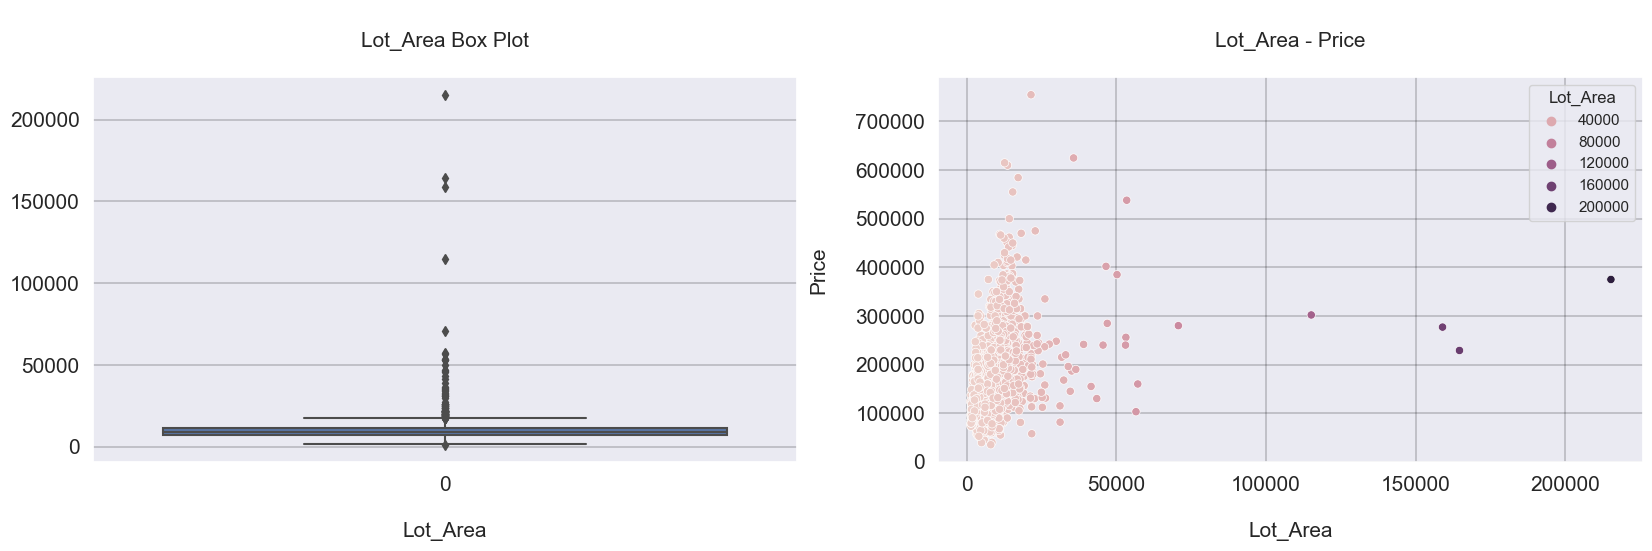


Skewness of Lot Area: 13.385593081237493 


In [32]:
Numerical_Plot("Lot_Area")
skewness_Lot_area = stats.skew(data_after_EDA["Lot_Area"])
print(f'Skewness of Lot Area: {skewness_Lot_area} ')

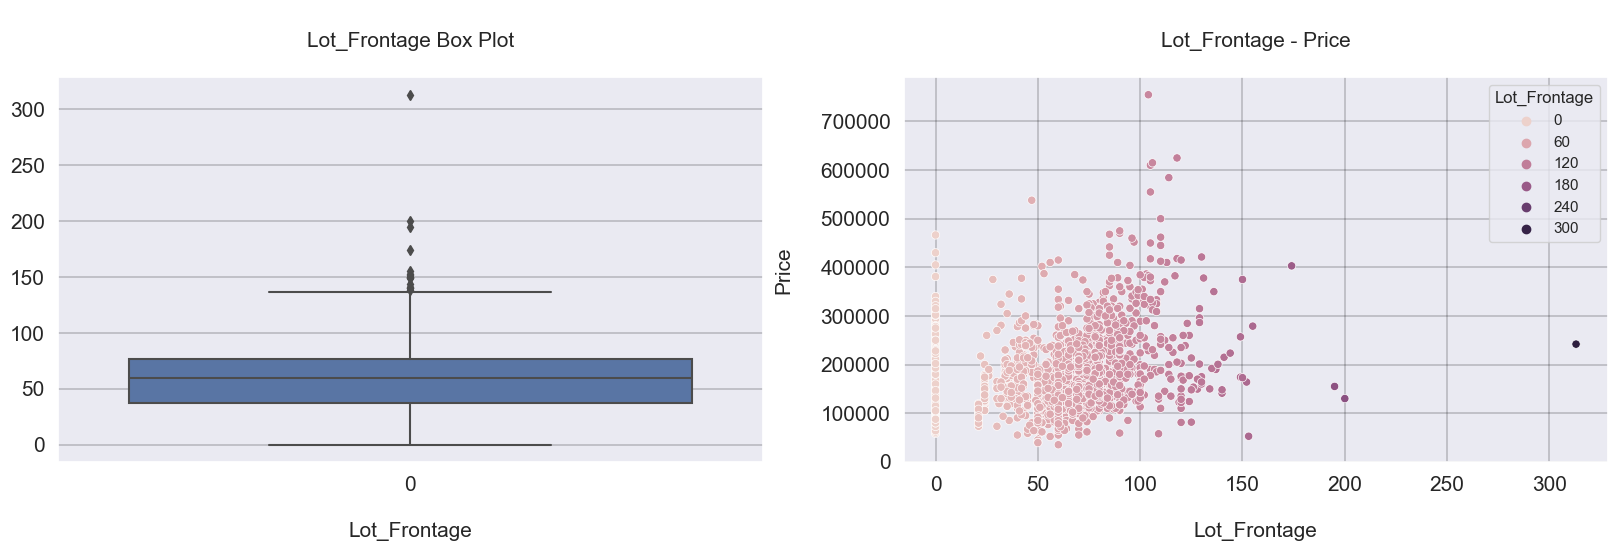


Skewness of Lot Frontage: 13.385593081237493 


In [33]:
Numerical_Plot("Lot_Frontage")
skewness_Lot_Frontage = stats.skew(data_after_EDA["Lot_Frontage"])
print(f'Skewness of Lot Frontage: {skewness_Lot_area} ')

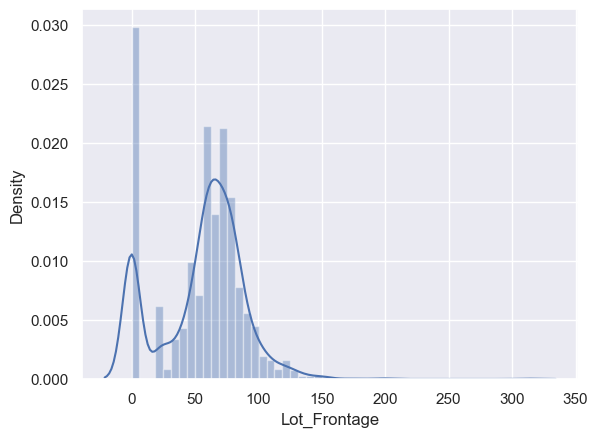

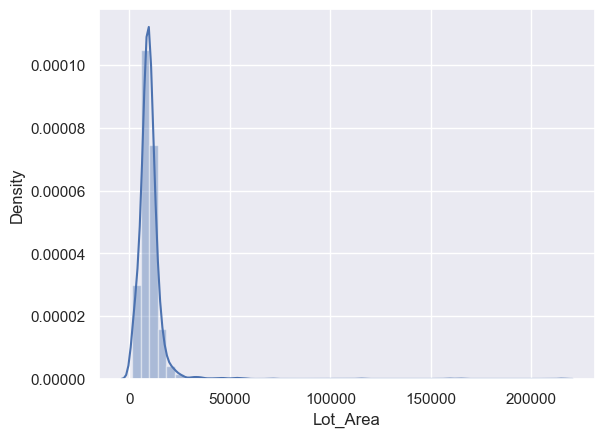

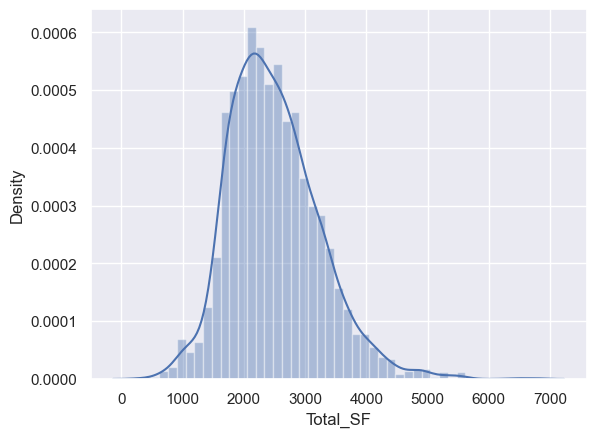

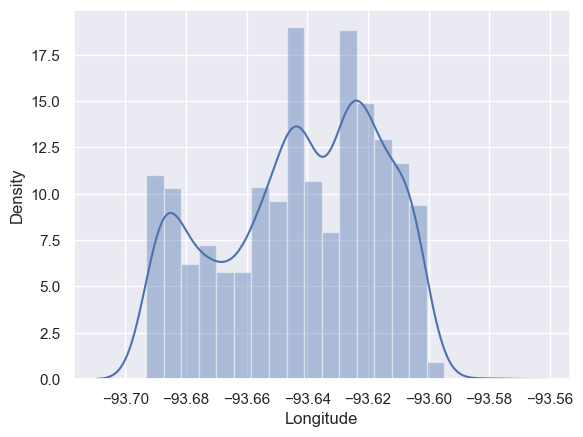

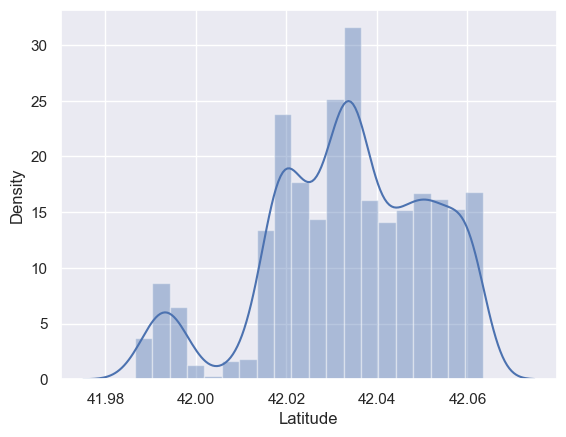

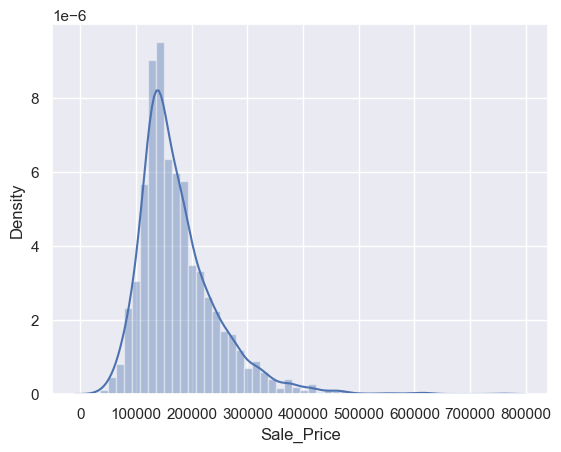

In [34]:
for var in Conti_Features:
    sns.distplot(data_after_EDA[var])
    plt.show()

By observing above plots we can conclude that the data is not normally distributed and there are outliers which has to be treated.

## Discrete variables

In [35]:
Discrete_vars_Cat = ['Year_Built','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']
Discrete_vars_Cat

['Year_Built',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces']

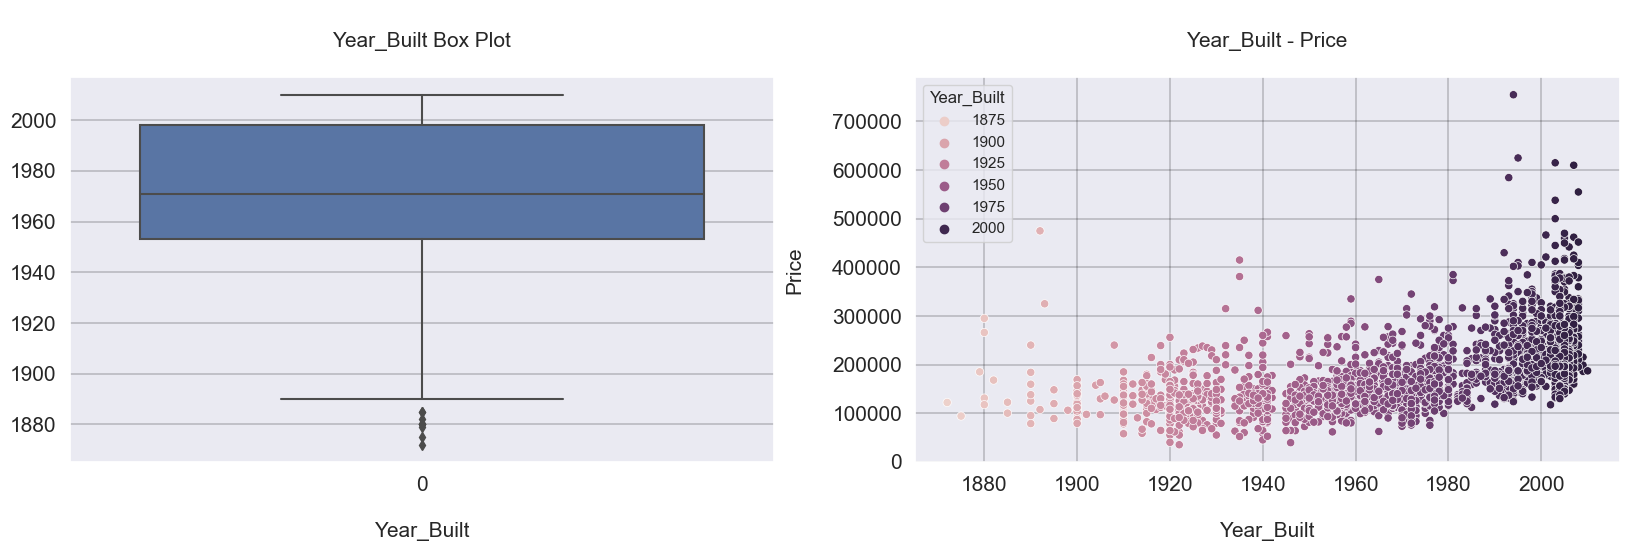

In [36]:
Numerical_Plot("Year_Built")

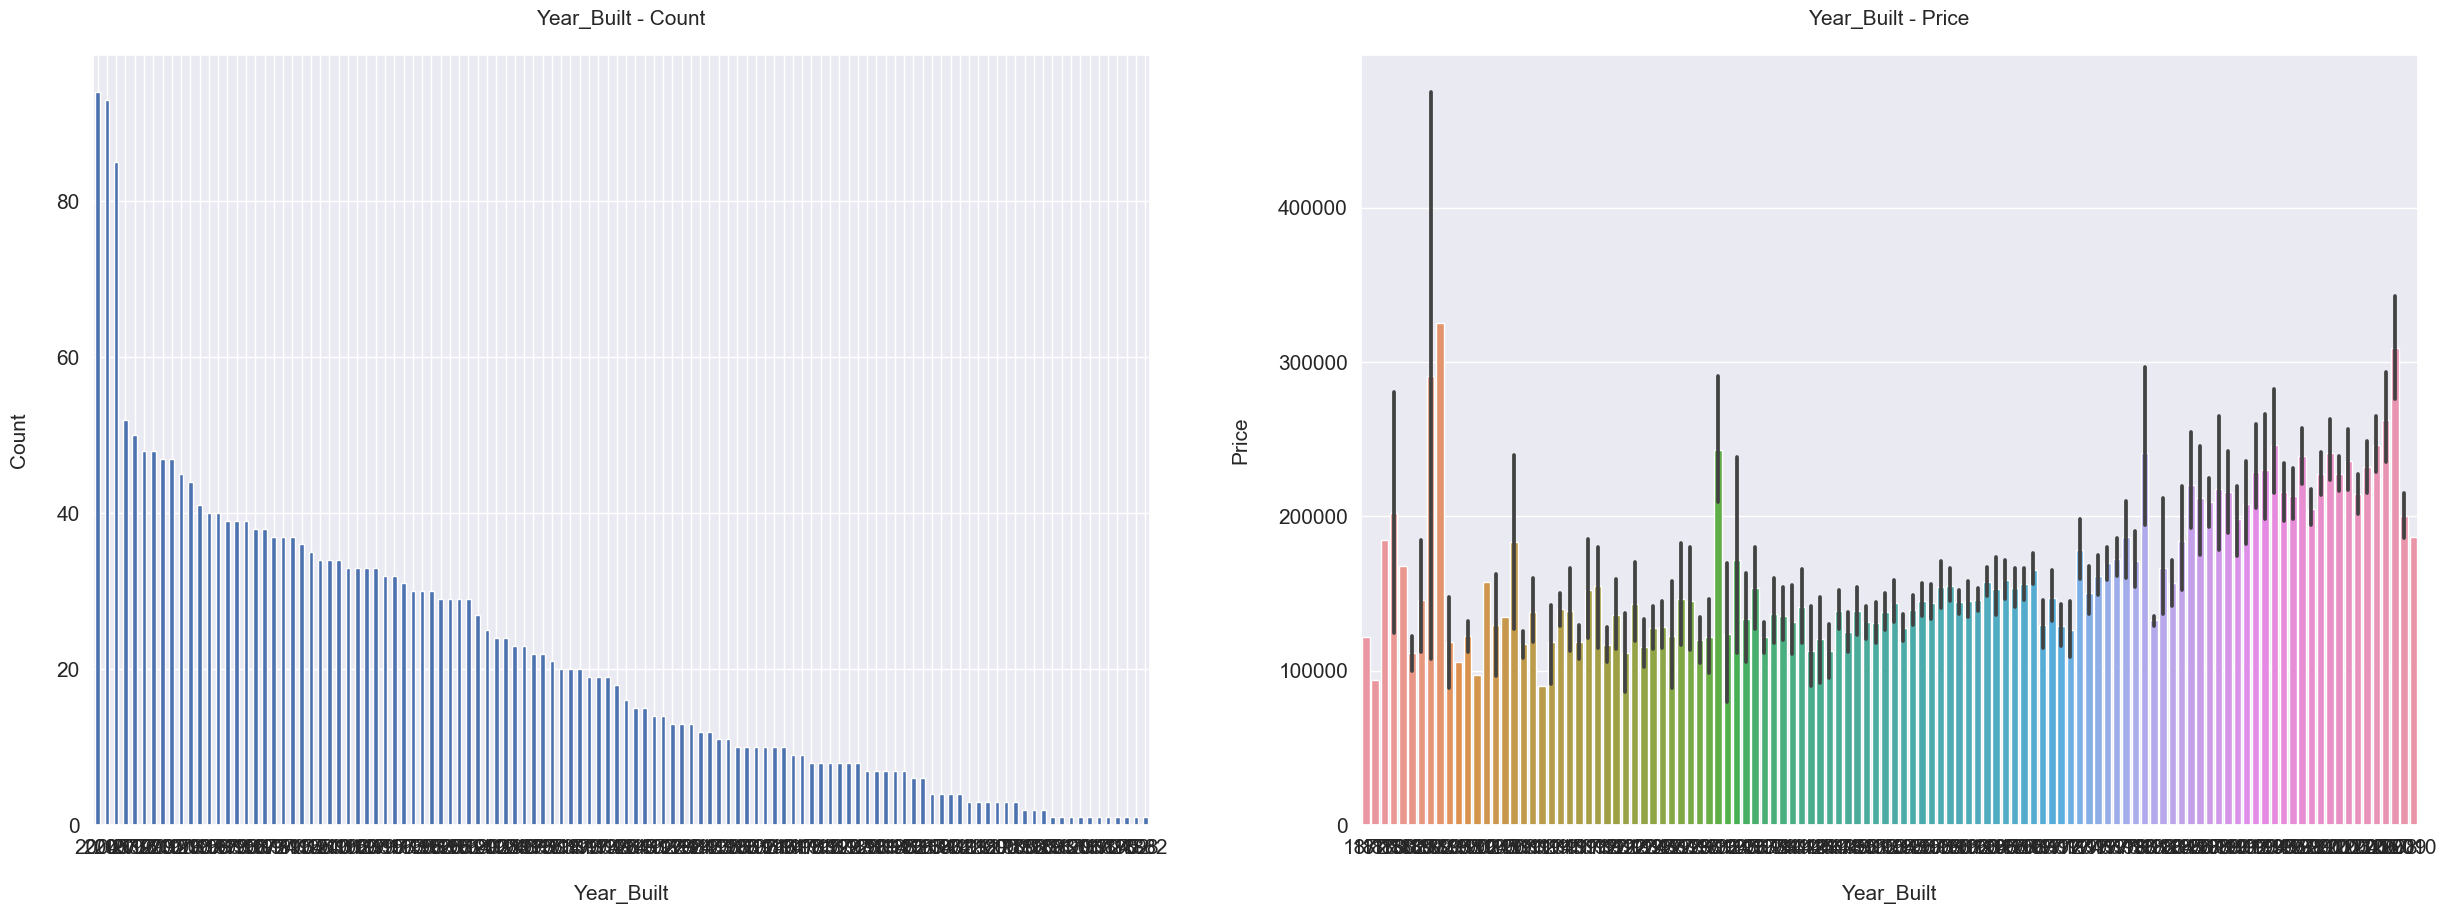

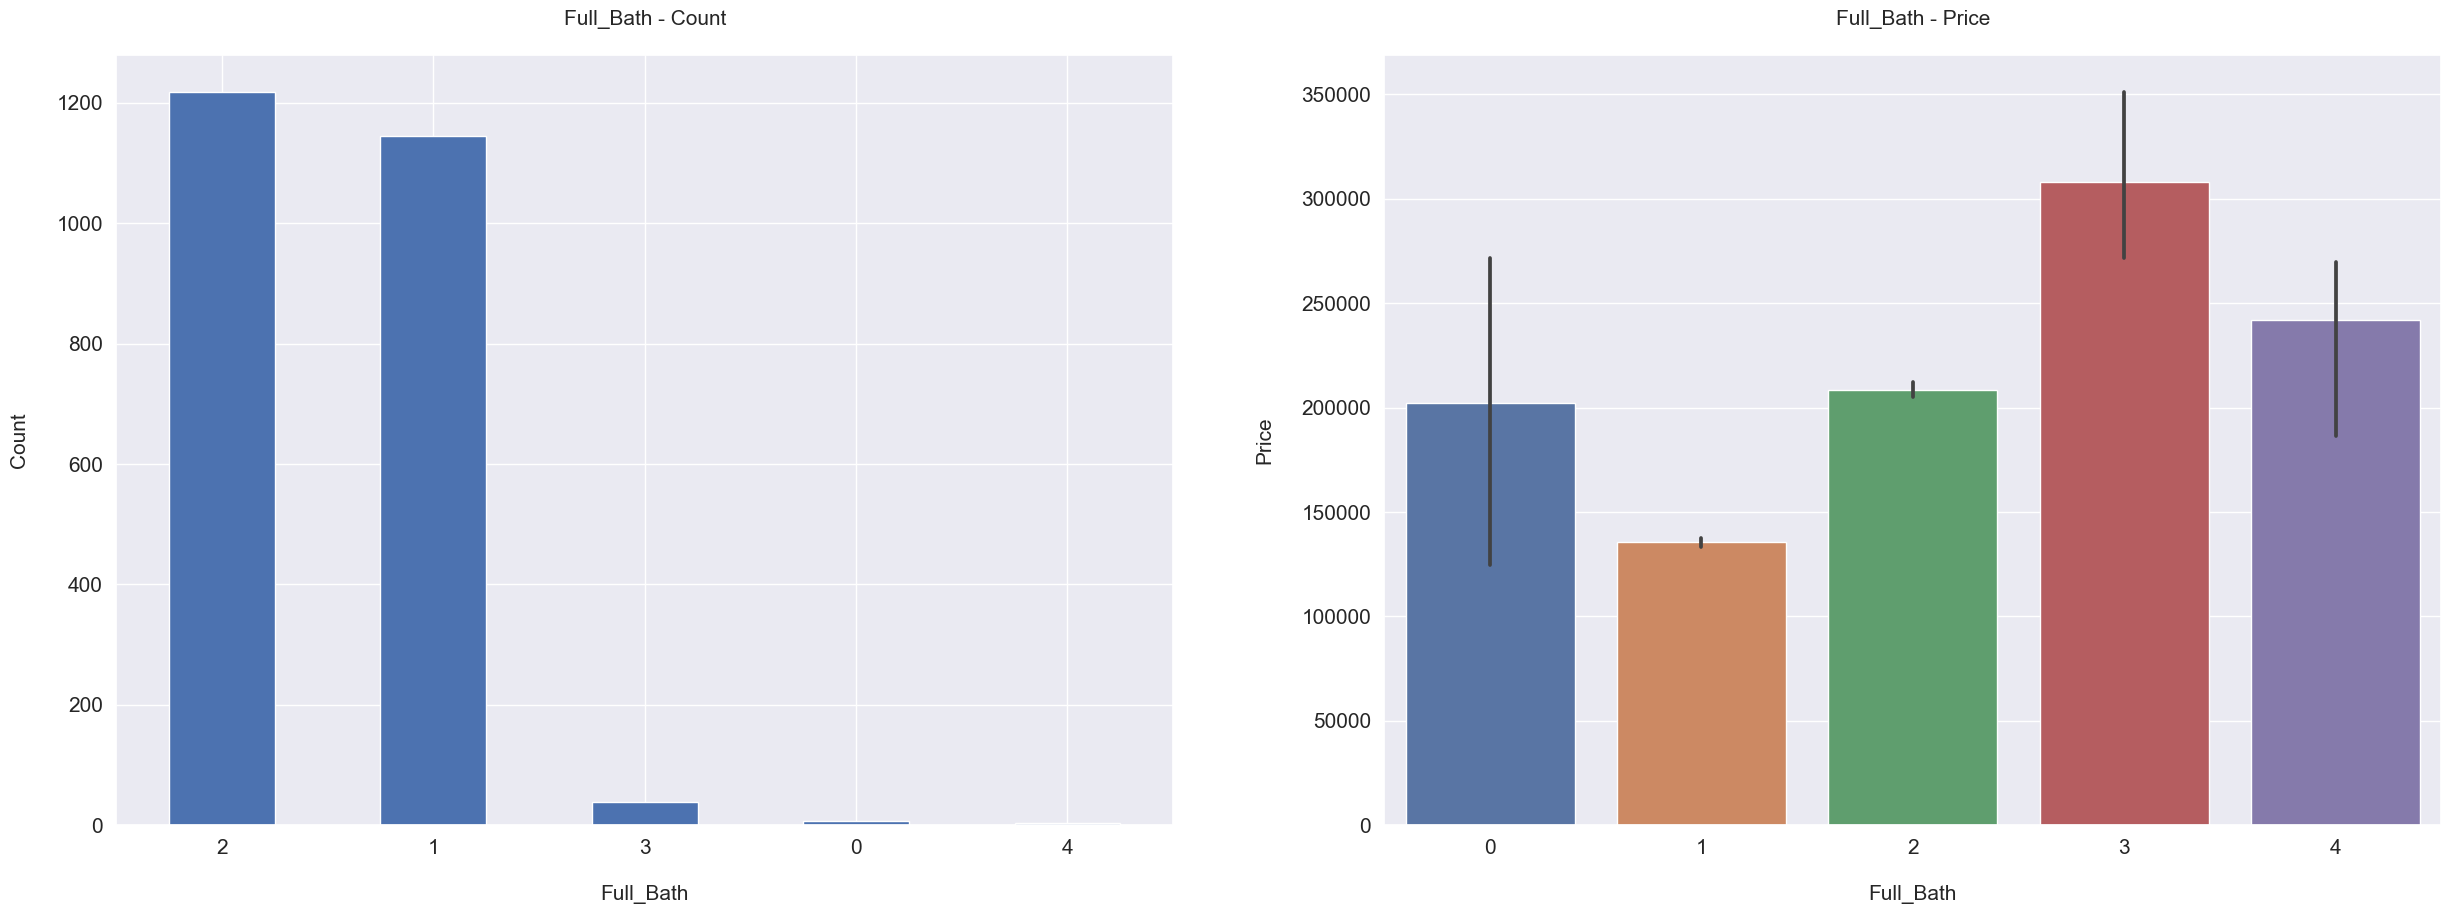

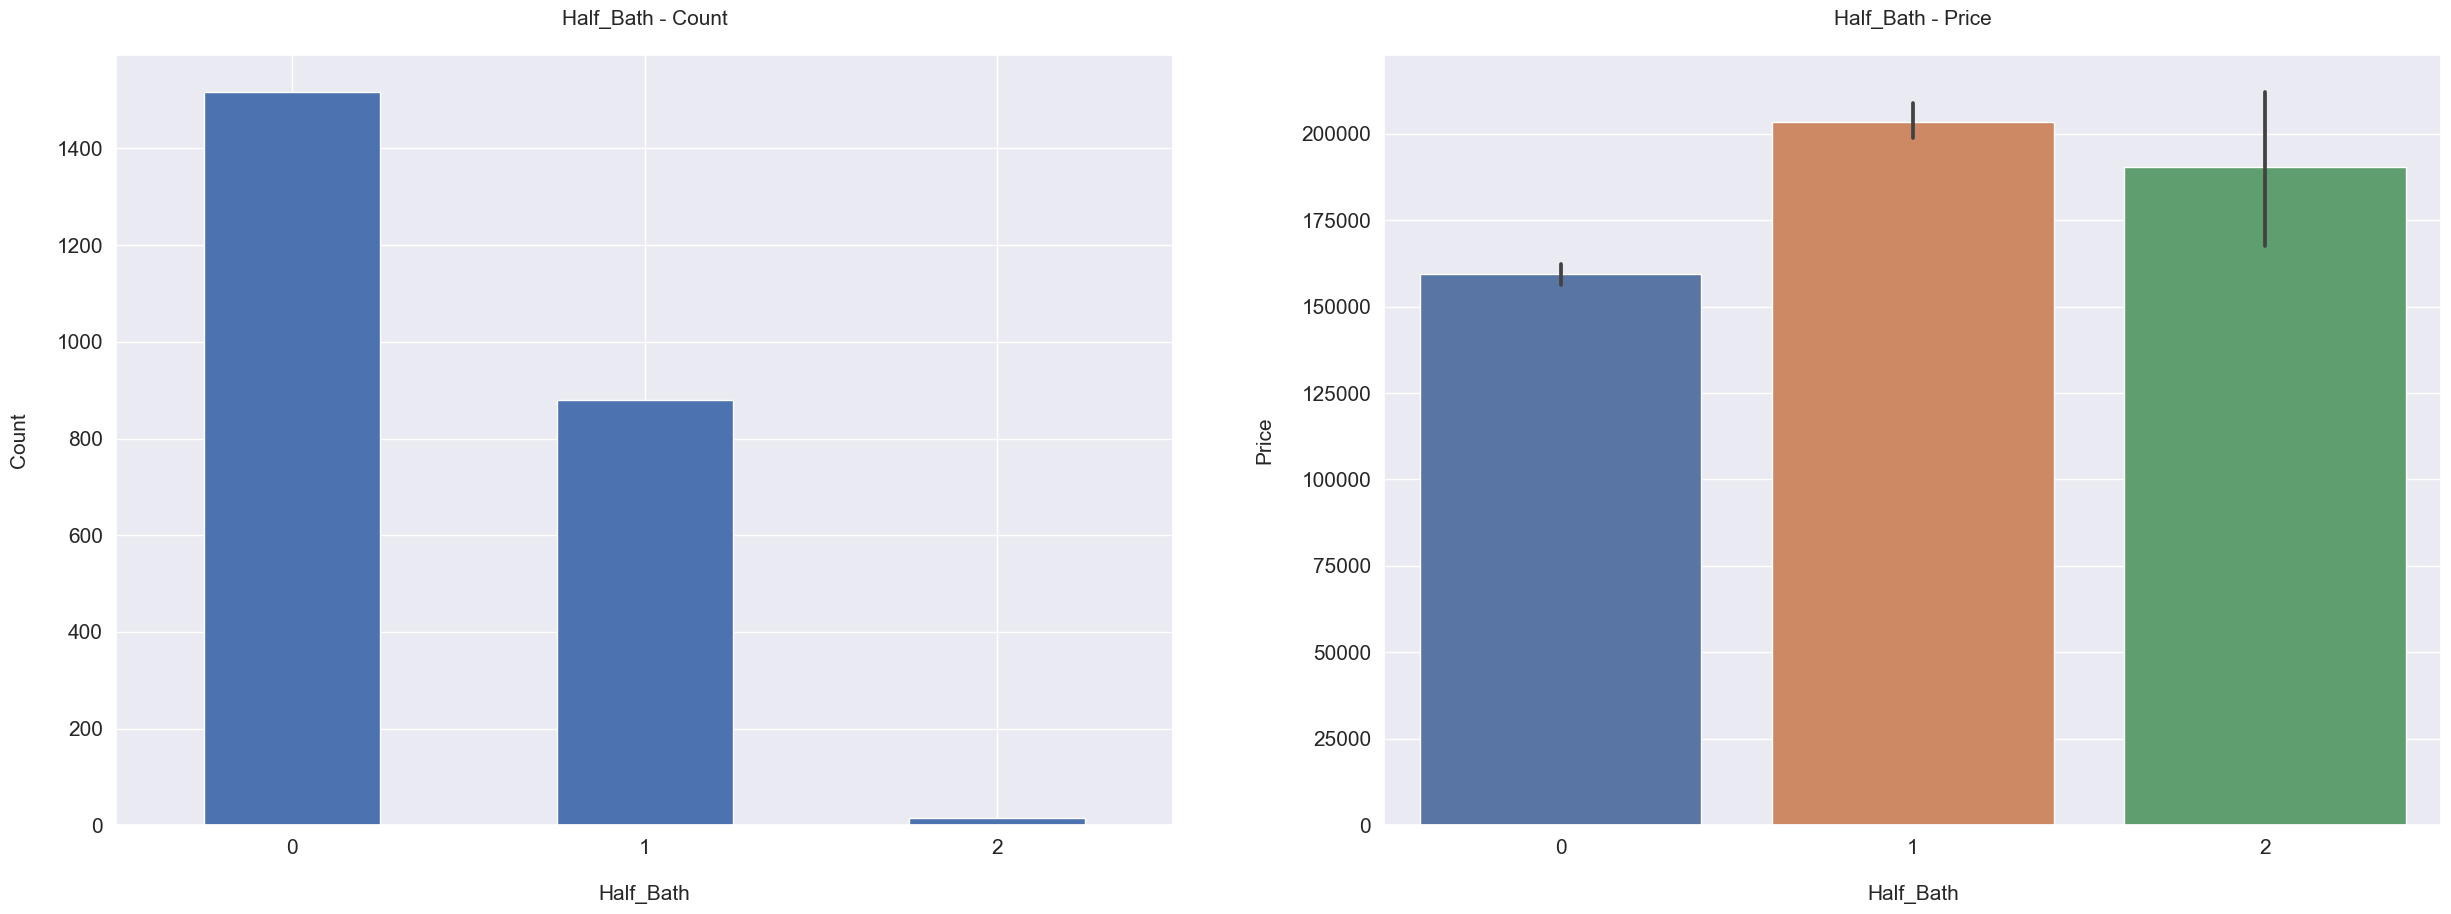

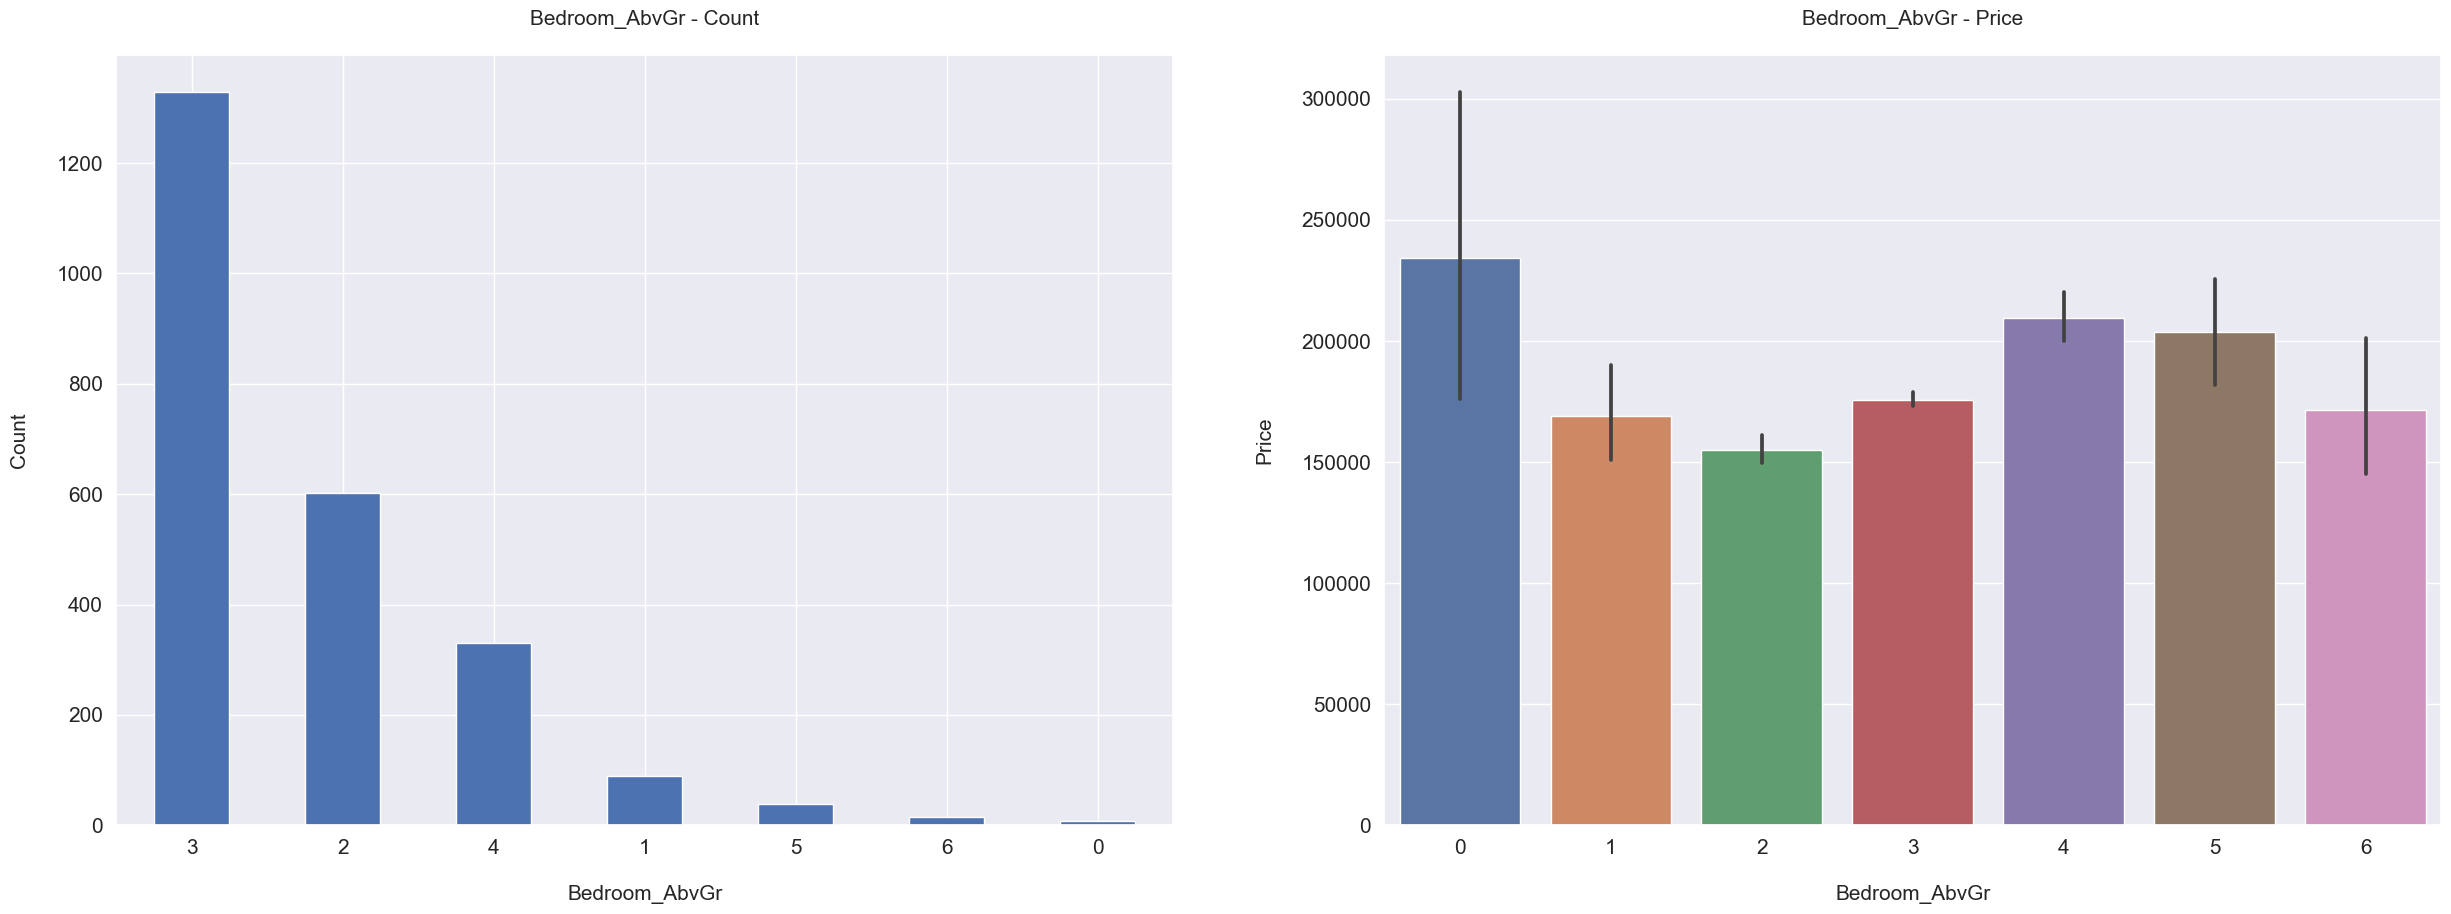

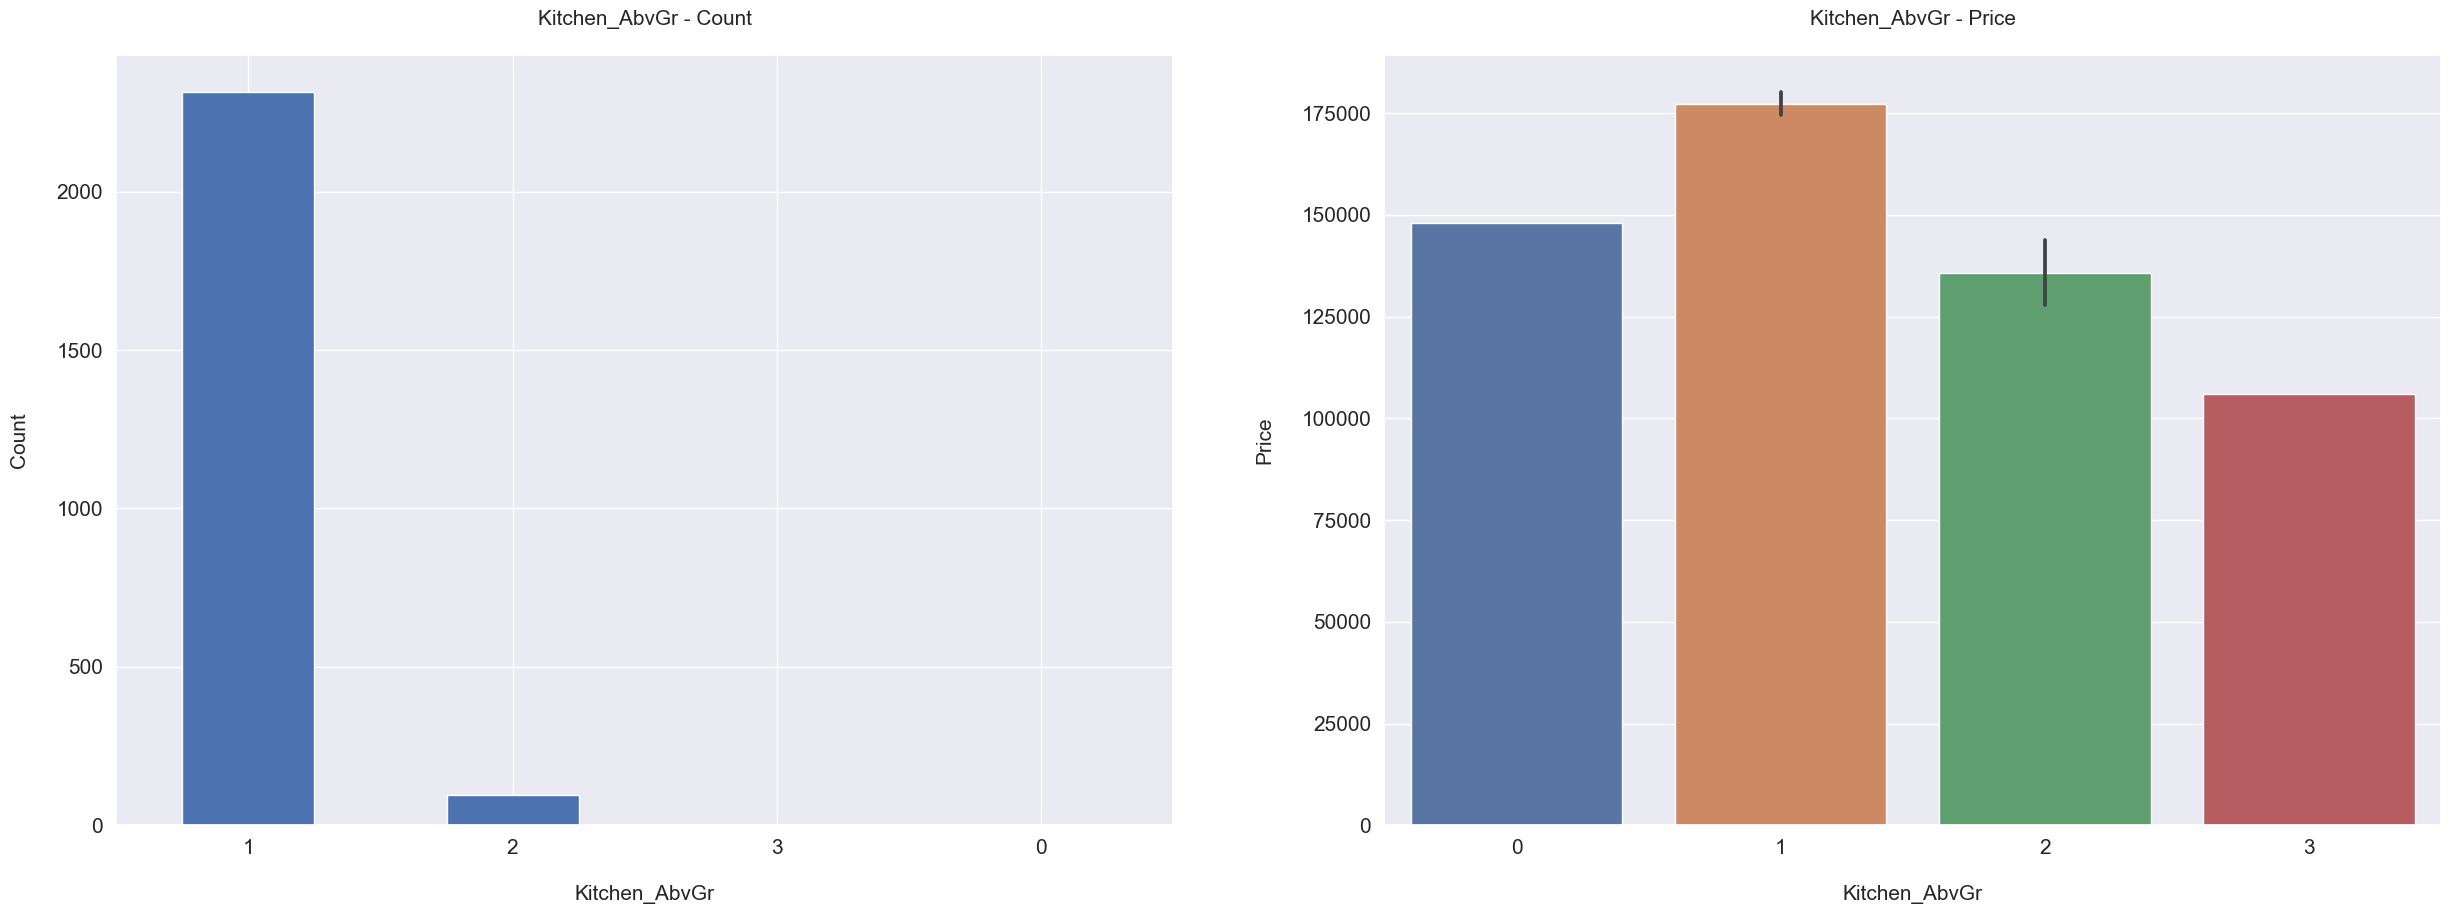

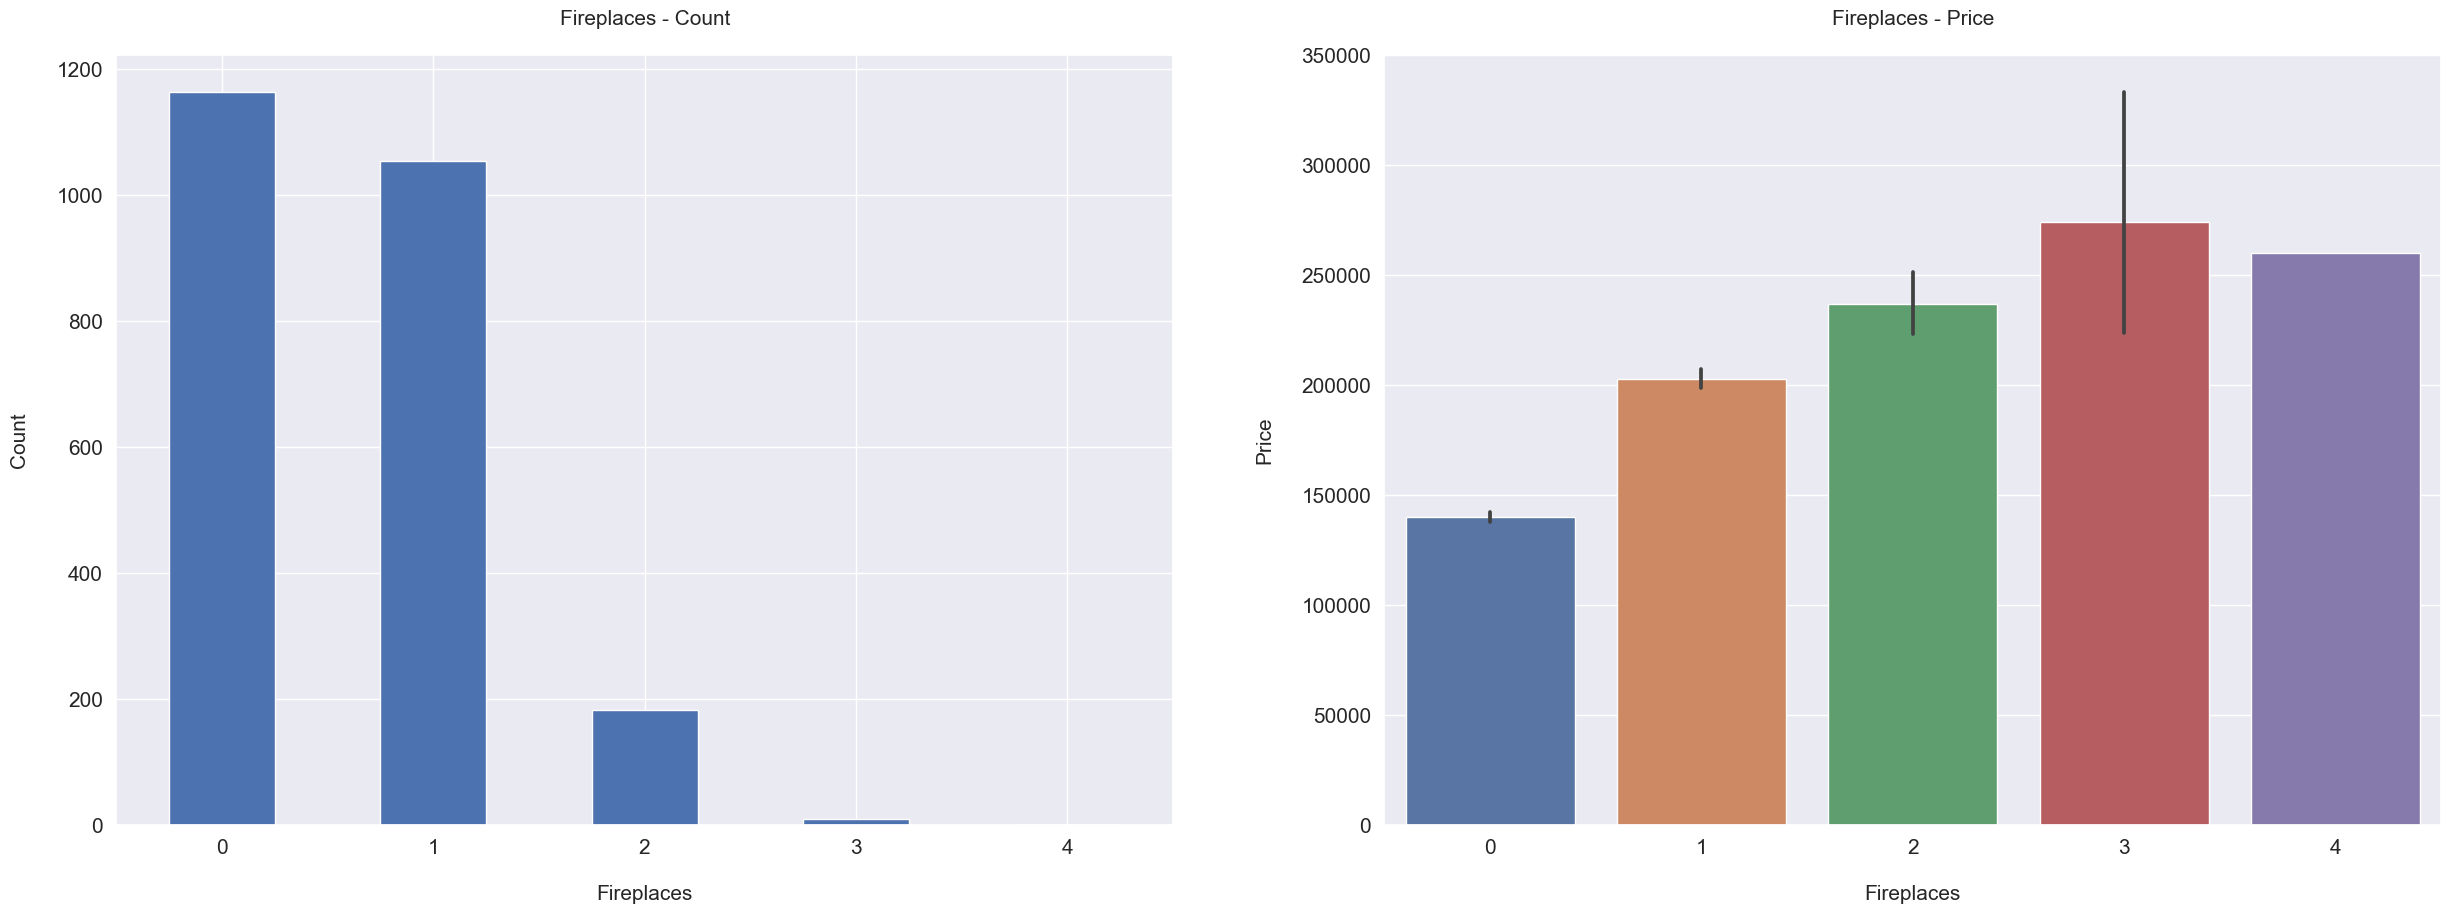

In [37]:
for feature in Discrete_vars_Cat:
     Categorical_Plot(feature)

# Transformation 

## Checking Linearity and transforming the data 


In [38]:
data_after_EDA.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style  Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story             4        1960   
1            80     11622    OneFam   One_Story             5        1961   
2            81     14267    OneFam   One_Story             5        1958   
3            93     11160    OneFam   One_Story             4        1968   
4            74     13830    OneFam   Two_Story             4        1997   

   Exter_Cond  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  \
0           2          1          0              3              1           2   
1           2          1          0              2              1           0   
2           2          1          1              3              1           0   
3           2          2          1              3              1           2   
4           2          2          1              3              1           1   

   Longitude   Latitude  Sale_Price  Total_SF  
0 -93.619754  42.054035      215000      2736  
1 -93.619756  42.053014      105000      1778  
2 -93.619387  42.052659      172000      2658  
3 -93.617320  42.051245      244000      4220  
4 -93.638933  42.060899      189900      2557

In [39]:
 data_after_EDA['Sale_Price'] = np.log(data_after_EDA['Sale_Price'])

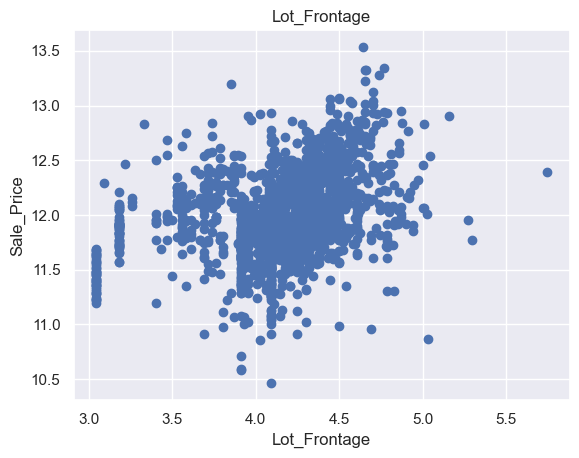

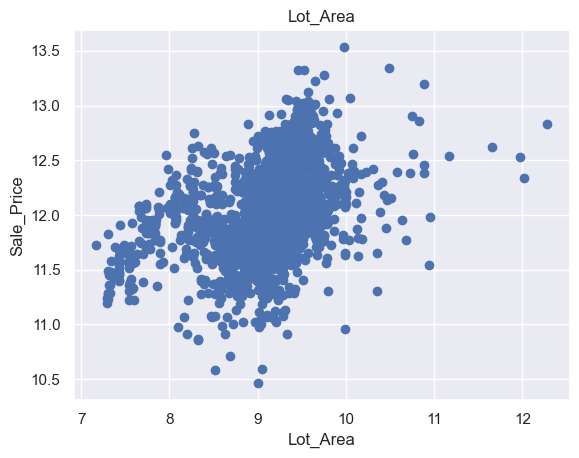

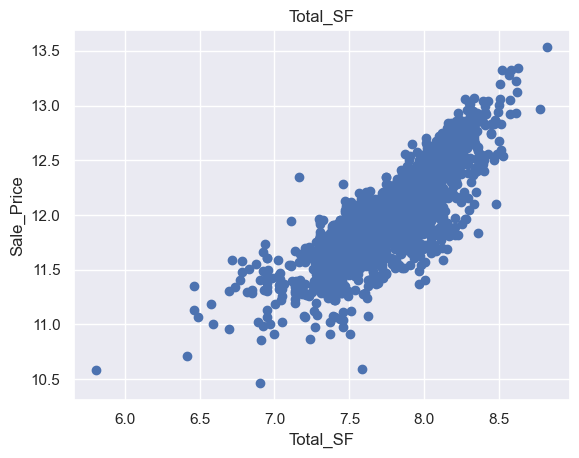

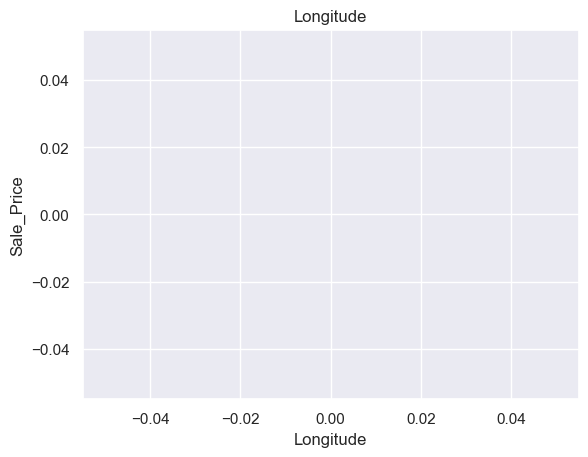

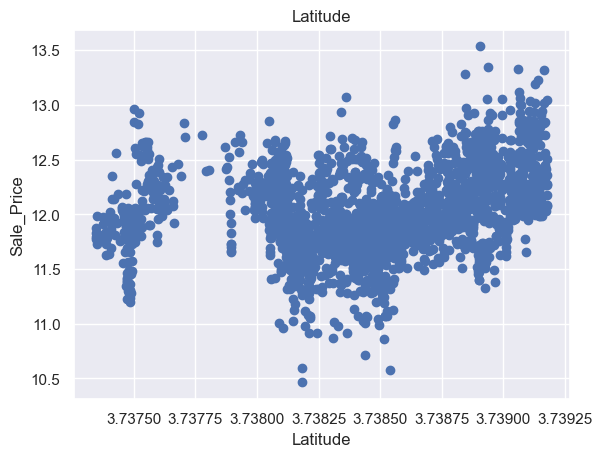

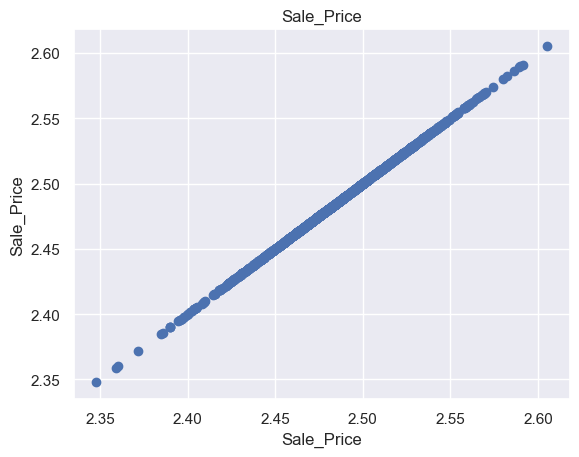

In [40]:
for feature in Conti_Features:
        data_after_EDA[feature] = np.log(data_after_EDA[feature])
        #data_to_transform['income']  = np.log(data_to_transform['income'])
        plt.scatter(data_after_EDA[feature],data_after_EDA['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale_Price')
        plt.title(feature)
        plt.show()
        

## Detecting outliers using Box-plot

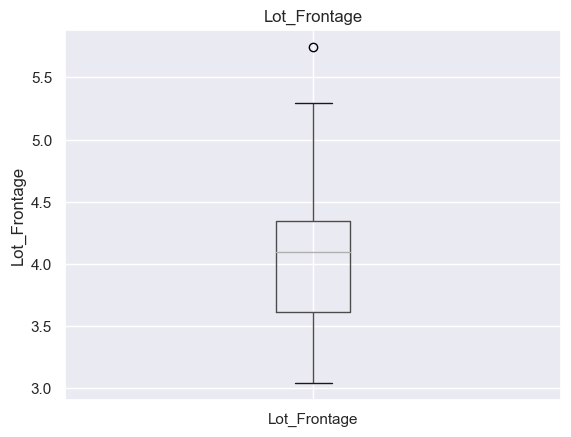

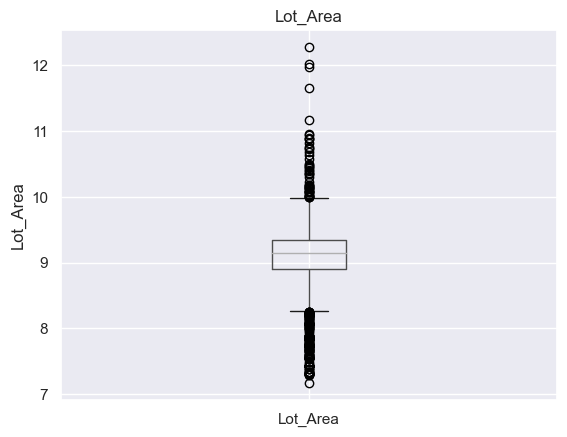

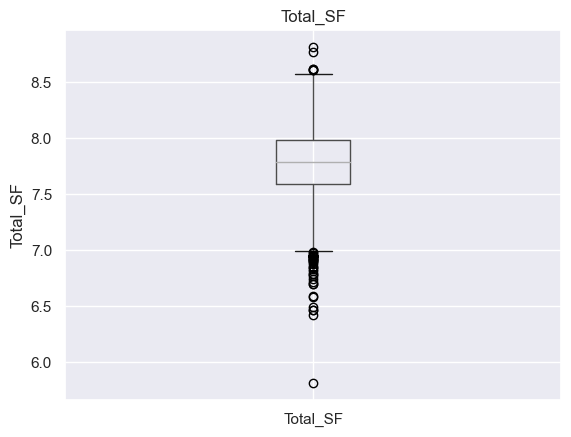

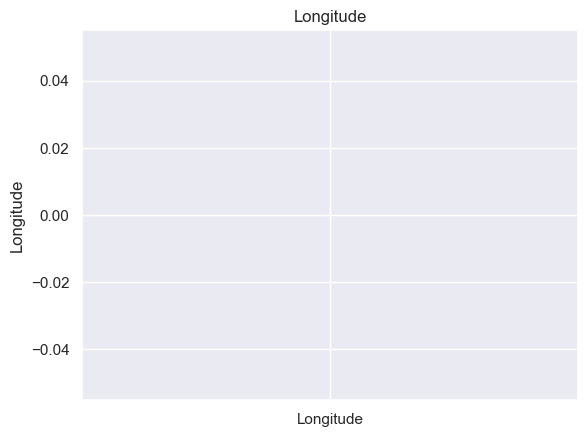

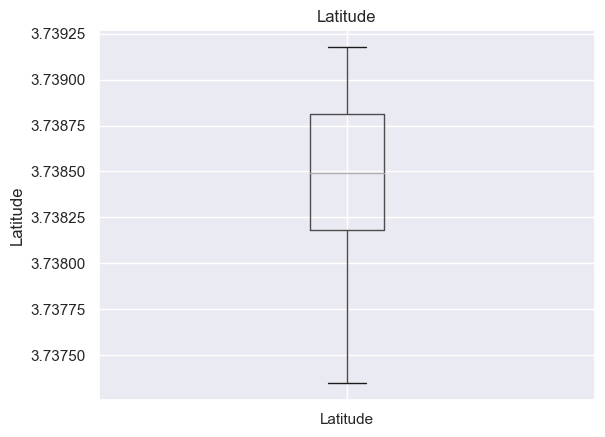

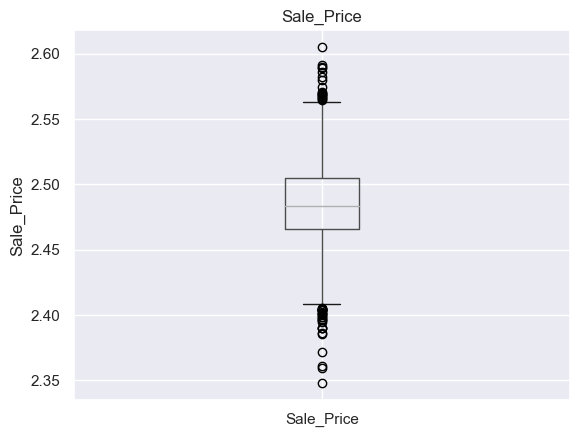

In [41]:
# for every feature finding the outliers
for feature in Conti_Features:
        data_after_EDA.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [42]:
Num_colms = ['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Total_SF',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces',
 'Longitude',
 'Latitude',
 'Sale_Price']
print(Num_colms)

['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


In [43]:
data_after_EDA

Lot_Frontage   Lot_Area Bldg_Type House_Style  Overall_Cond  Year_Built  \
0         4.948760  10.366278    OneFam   One_Story             4        1960   
1         4.382027   9.360655    OneFam   One_Story             5        1961   
2         4.394449   9.565704    OneFam   One_Story             5        1958   
3         4.532599   9.320091    OneFam   One_Story             4        1968   
4         4.304065   9.534595    OneFam   Two_Story             4        1997   
...            ...        ...       ...         ...           ...         ...   
2408      3.610918   8.979291    OneFam        SLvl             5        1984   
2409          -inf   9.092120    OneFam   One_Story             4        1983   
2410      4.127134   9.253496    OneFam      SFoyer             4        1992   
2411      4.343805   9.211340    OneFam   One_Story             4        1974   
2412      4.304065   9.172327    OneFam   Two_Story             4        1993   

      Exter_Cond  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              2          1          0              3              1   
1              2          1          0              2              1   
2              2          1          1              3              1   
3              2          2          1              3              1   
4              2          2          1              3              1   
...          ...        ...        ...            ...            ...   
2408           2          1          0              3              1   
2409           2          1          0              2              1   
2410           2          1          0              3              1   
2411           2          1          0              2              1   
2412           2          2          1              3              1   

      Fireplaces  Longitude  Latitude  Sale_Price  Total_SF  
0              2        NaN  3.738955    2.507841  7.914252  
1              0        NaN  3.738931    2.447699  7.483244  
2              0        NaN  3.738923    2.489500  7.885329  
3              2        NaN  3.738889    2.518093  8.347590  
4              1        NaN  3.739119    2.497679  7.846590  
...          ...        ...       ...         ...       ...  
2408           0        NaN  3.737407    2.473770  7.603898  
2409           0        NaN  3.737391    2.466654  7.476472  
2410           0        NaN  3.737348    2.467299  7.540090  
2411           1        NaN  3.737453    2.488530  7.929487  
2412           1        NaN  3.737414    2.496851  8.005033  

[2413 rows x 16 columns]

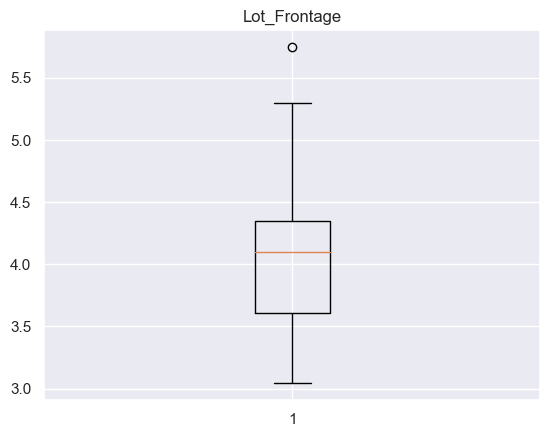

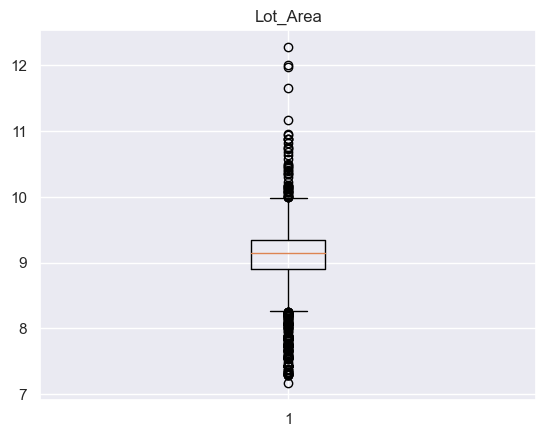

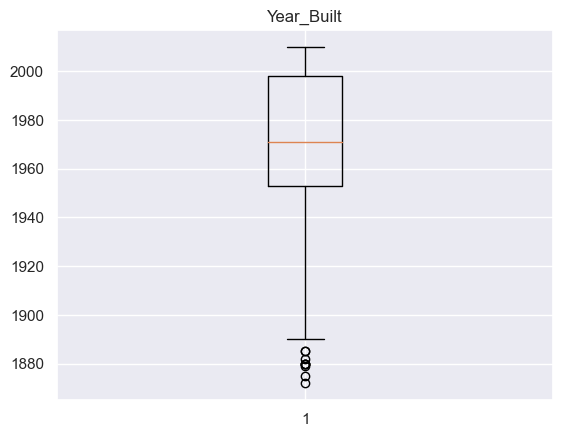

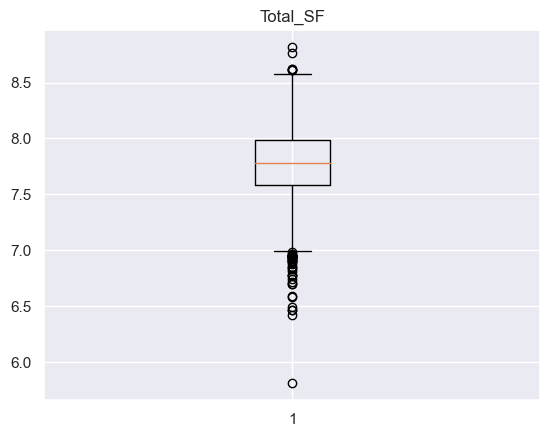

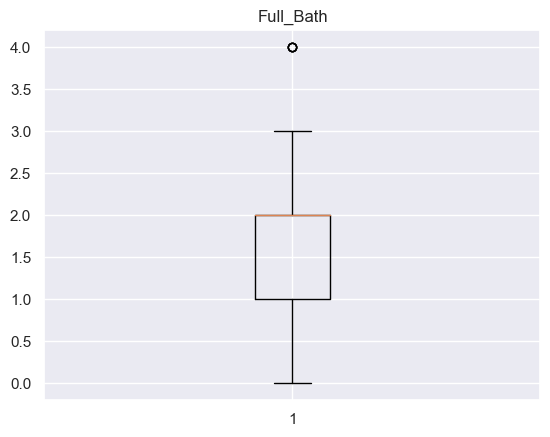

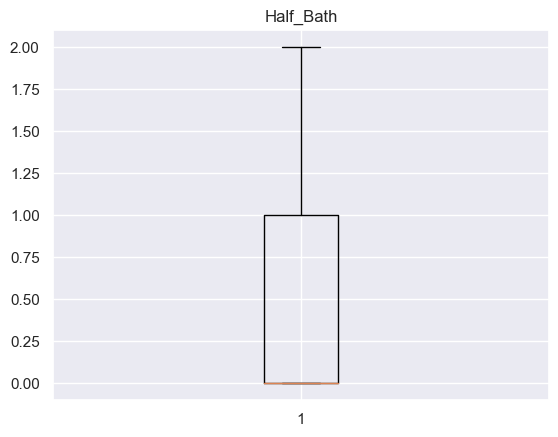

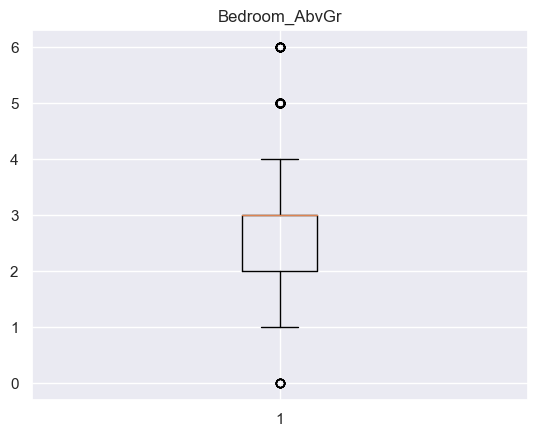

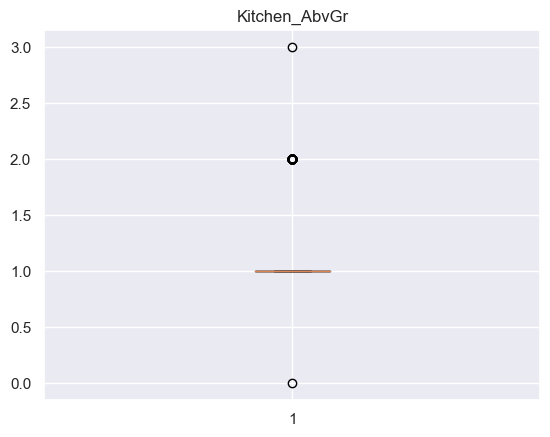

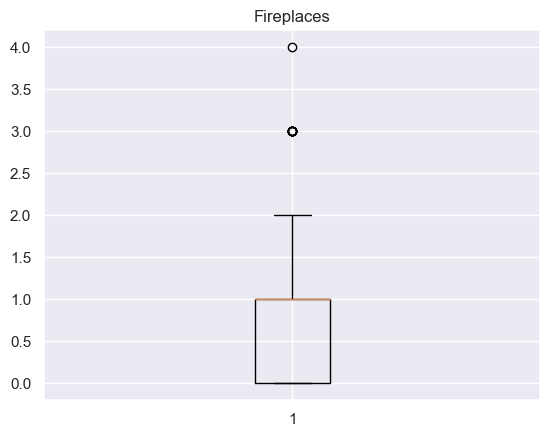

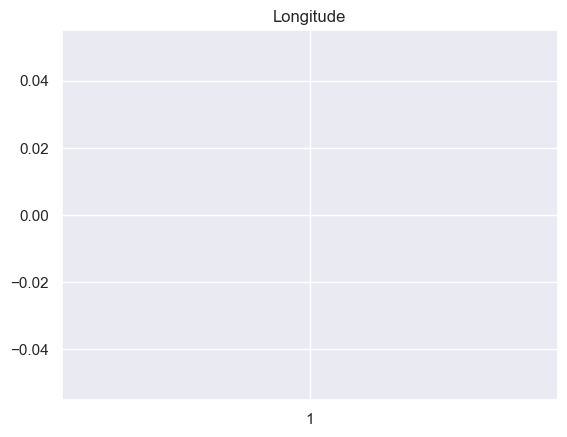

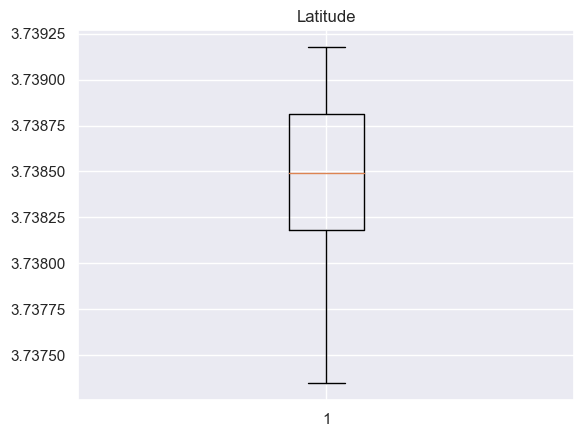

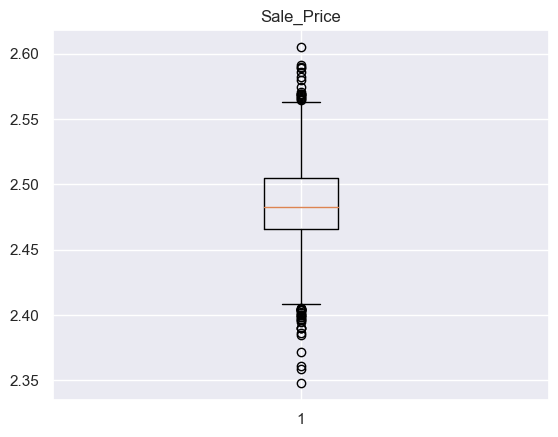

In [44]:
for feature in Num_colms:
    plt.boxplot(data_after_EDA[feature])
    plt.title(feature)
    plt.show()

In [45]:
data_test = data_after_EDA.copy()

In [46]:
for feature in Num_colms:
    
    Q1 = data_after_EDA[feature].quantile(0.25)
    Q3 = data_after_EDA[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    print('IQR of {} is '.format(feature),IQR )

IQR of Lot_Frontage is  0.7328875092094598
IQR of Lot_Area is  0.4338364360903135
IQR of Year_Built is  45.0
IQR of Total_SF is  0.39578843468827696
IQR of Full_Bath is  1.0
IQR of Half_Bath is  1.0
IQR of Bedroom_AbvGr is  1.0
IQR of Kitchen_AbvGr is  0.0
IQR of Fireplaces is  1.0
IQR of Longitude is  nan
IQR of Latitude is  0.0006292409739421245
IQR of Sale_Price is  0.03903259812647075


In [47]:
for feature in Num_colms:
    print(feature ," - ", data_after_EDA[feature].skew())
    

Lot_Frontage  -  nan
Lot_Area  -  -0.5137145647219707
Year_Built  -  -0.5867241005730729
Total_SF  -  -0.4781639767740749
Full_Bath  -  0.24501289387833888
Half_Bath  -  0.6639923945958431
Bedroom_AbvGr  -  0.18415873770874286
Kitchen_AbvGr  -  4.681574232610174
Fireplaces  -  0.7390754323691339
Longitude  -  nan
Latitude  -  -0.5088441735646223
Sale_Price  -  0.031735649671393966


# Treating them by replacing outliers with median

## Tukey's Inter-Quantile Range (IQR) 


In [48]:
for feature in Num_colms:
        Q1 = data_after_EDA[feature].quantile(0.25)
        Q3 = data_after_EDA[feature].quantile(0.75)

        IQR = Q3-Q1

        outliers_housing_data = ((data_after_EDA[feature] < (Q1-1.5*IQR)) | (data_after_EDA[feature] > (Q3+1.5*IQR))) #picked outliers
        median_N_col = data_after_EDA[feature].median()

        print(f'number of outliers: {data_after_EDA[outliers_housing_data].shape[0]}')
        data_after_EDA.loc[outliers_housing_data, feature] = median_N_col

for feature in Num_colms:
    print(feature ," - ", data_after_EDA[feature].skew())

number of outliers: 452
number of outliers: 223
number of outliers: 10
number of outliers: 47
number of outliers: 4
number of outliers: 0
number of outliers: 61
number of outliers: 98
number of outliers: 11
number of outliers: 0
number of outliers: 0
number of outliers: 46
Lot_Frontage  -  -0.9877791709524998
Lot_Area  -  -0.24781496945805806
Year_Built  -  -0.5373018191884568
Total_SF  -  0.0006293716382307551
Full_Bath  -  0.11628101067630868
Half_Bath  -  0.6639923945958431
Bedroom_AbvGr  -  -0.3473839460579168
Kitchen_AbvGr  -  0
Fireplaces  -  0.5683154233989373
Longitude  -  nan
Latitude  -  -0.5088441735646223
Sale_Price  -  0.17871014414969136


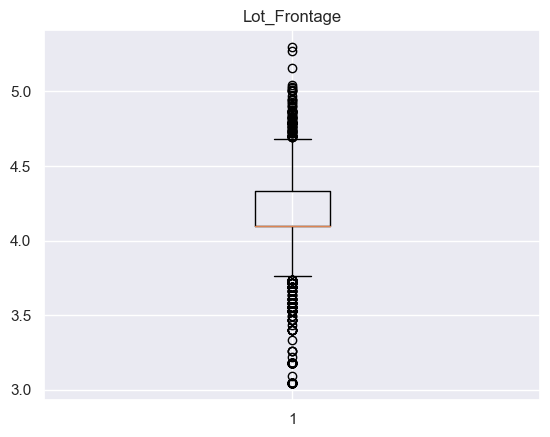

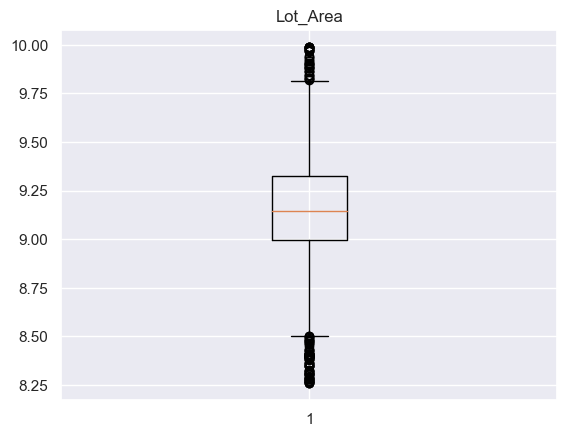

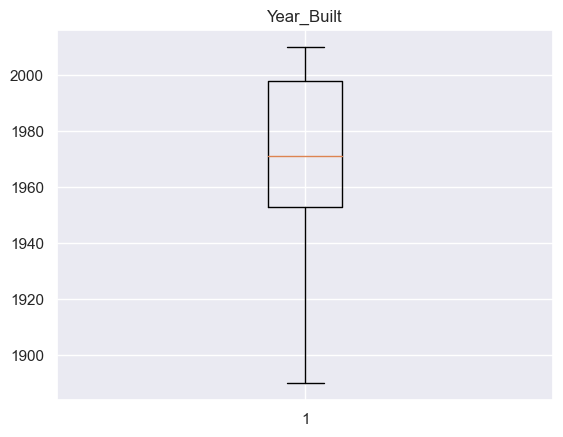

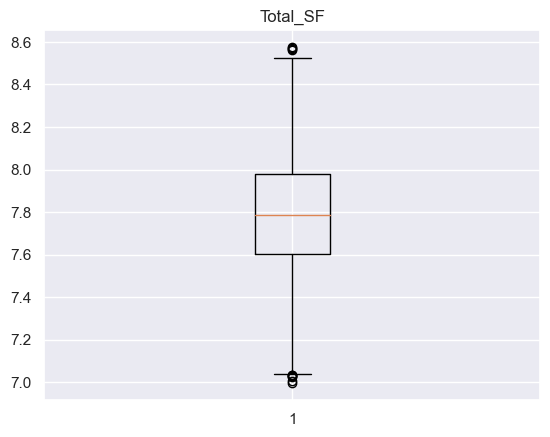

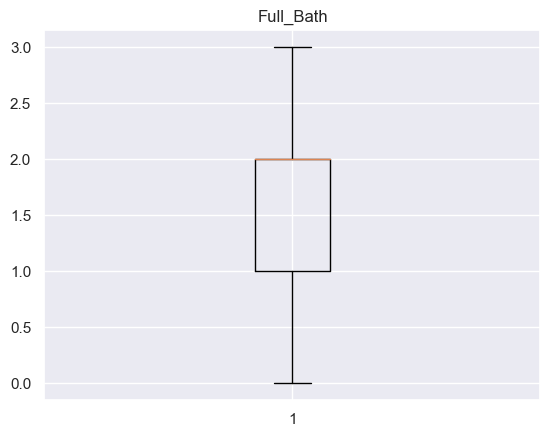

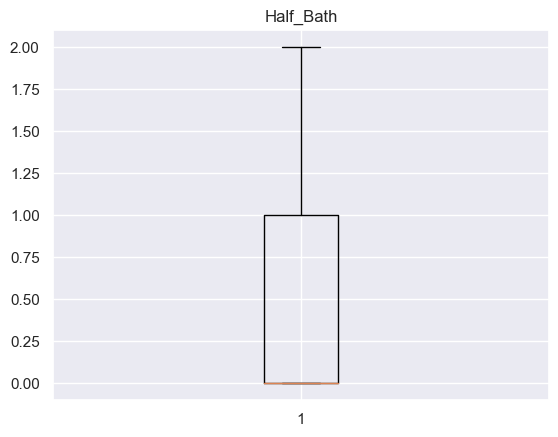

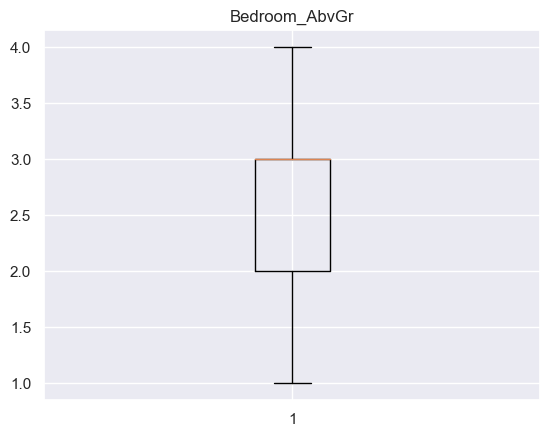

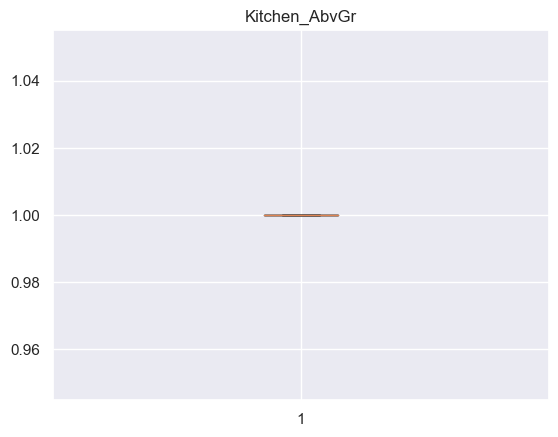

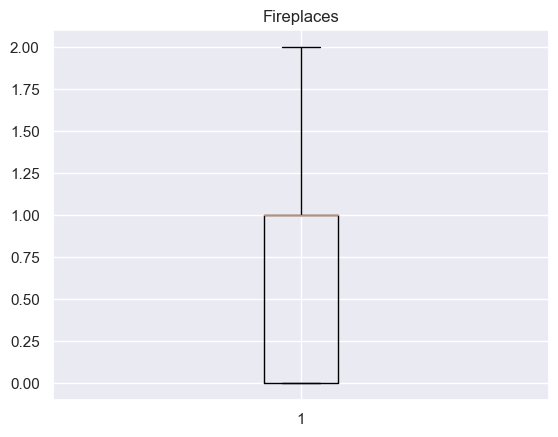

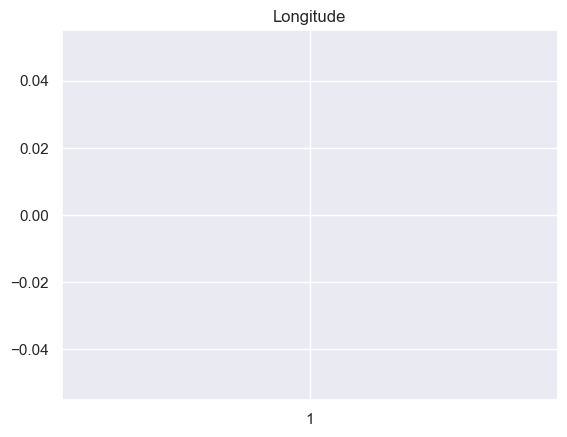

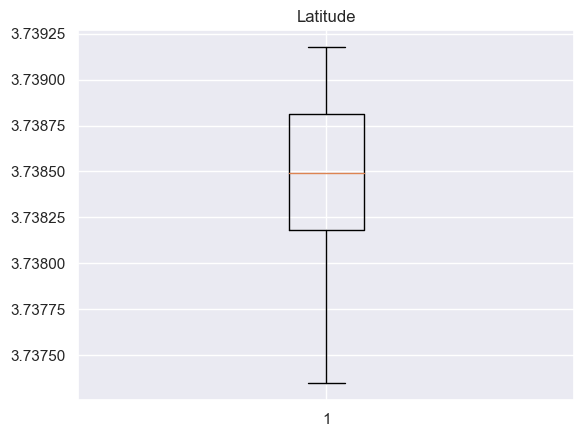

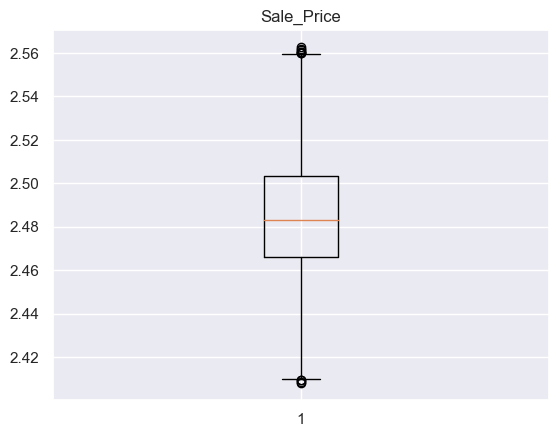

In [49]:
for feature in Num_colms:
    plt.boxplot(data_after_EDA[feature])
    plt.title(feature)
    plt.show()

## Normal distribution after treated the outliers 

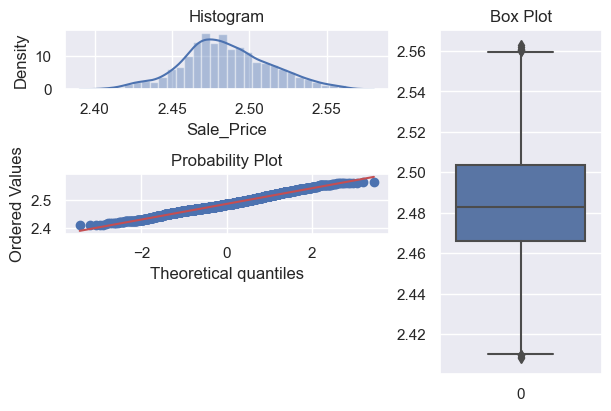

In [50]:
def plotting_sub_chart(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(6,4))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
   
    ax1 = fig.add_subplot(grid[0, :2])
    ## Setting the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_sub_chart(data_after_EDA, 'Sale_Price')

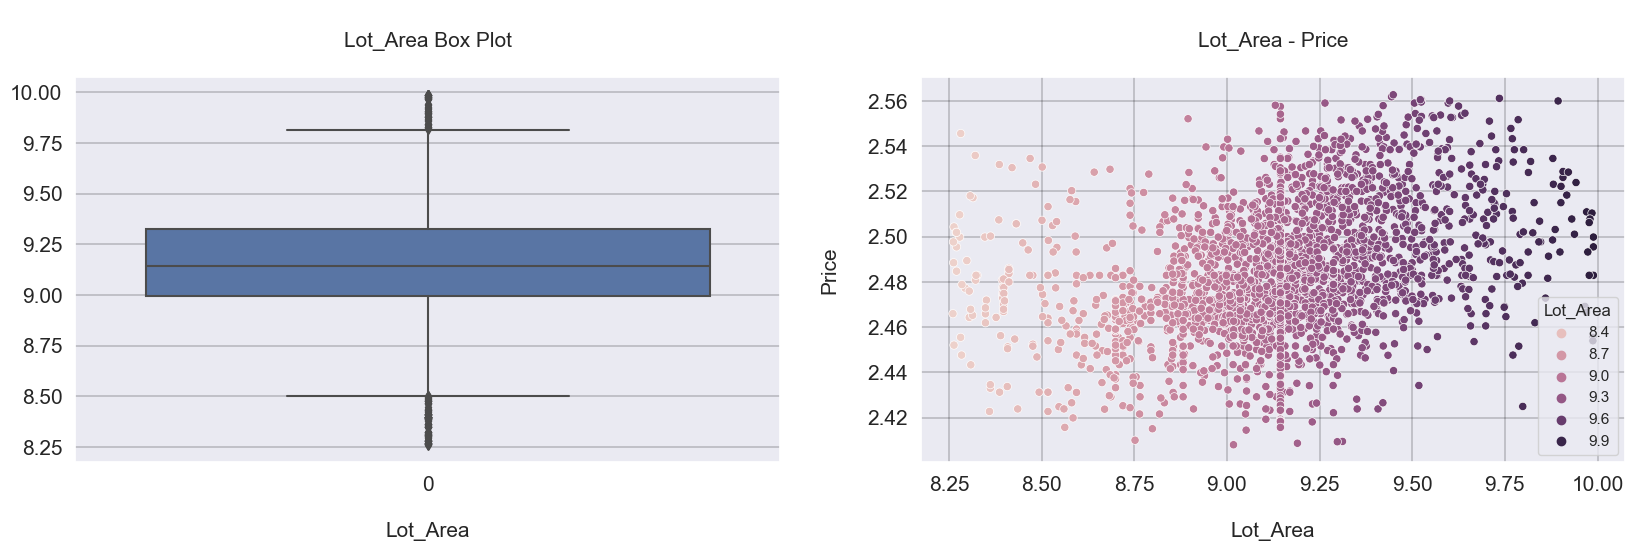


Skewness of Lot Area: -0.24766089293079743 


In [51]:
Numerical_Plot("Lot_Area")
skewness_Lot_area = stats.skew(data_after_EDA["Lot_Area"])
print(f'Skewness of Lot Area: {skewness_Lot_area} ')

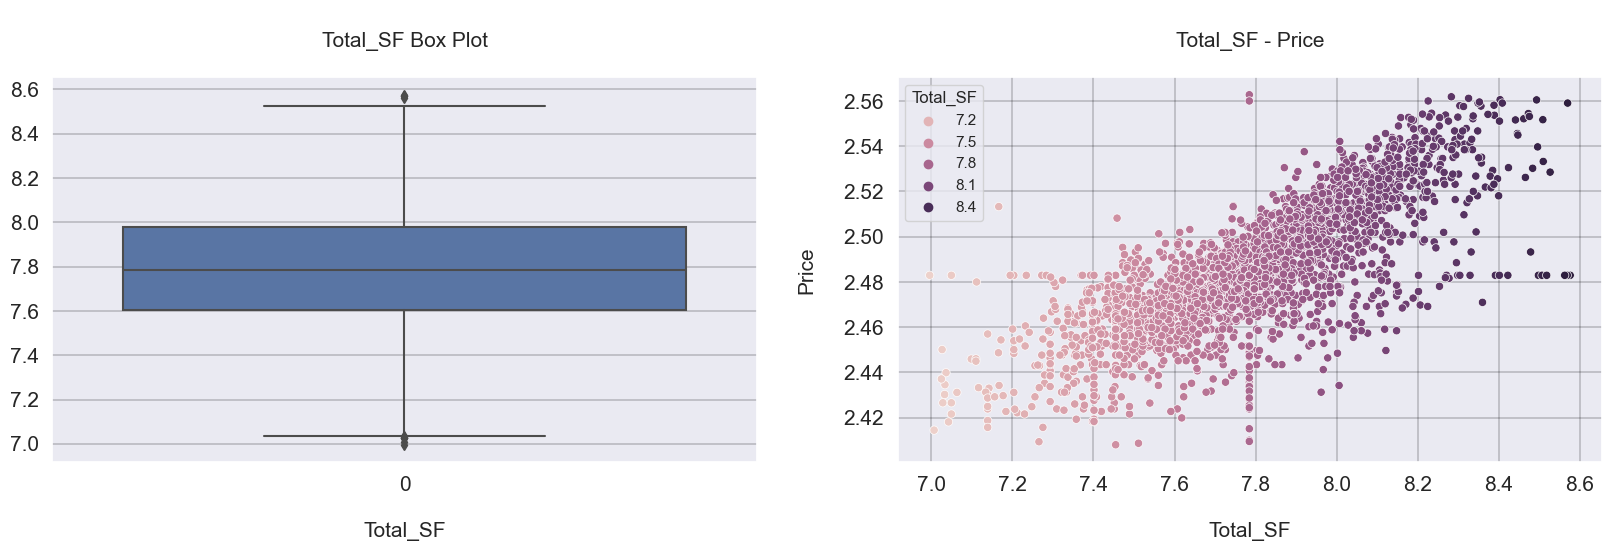


Skewness of Total SF: 0.0006289803325861162 


In [52]:
Numerical_Plot("Total_SF")
skewness_Total_SF = stats.skew(data_after_EDA["Total_SF"])
print(f'Skewness of Total SF: {skewness_Total_SF} ')

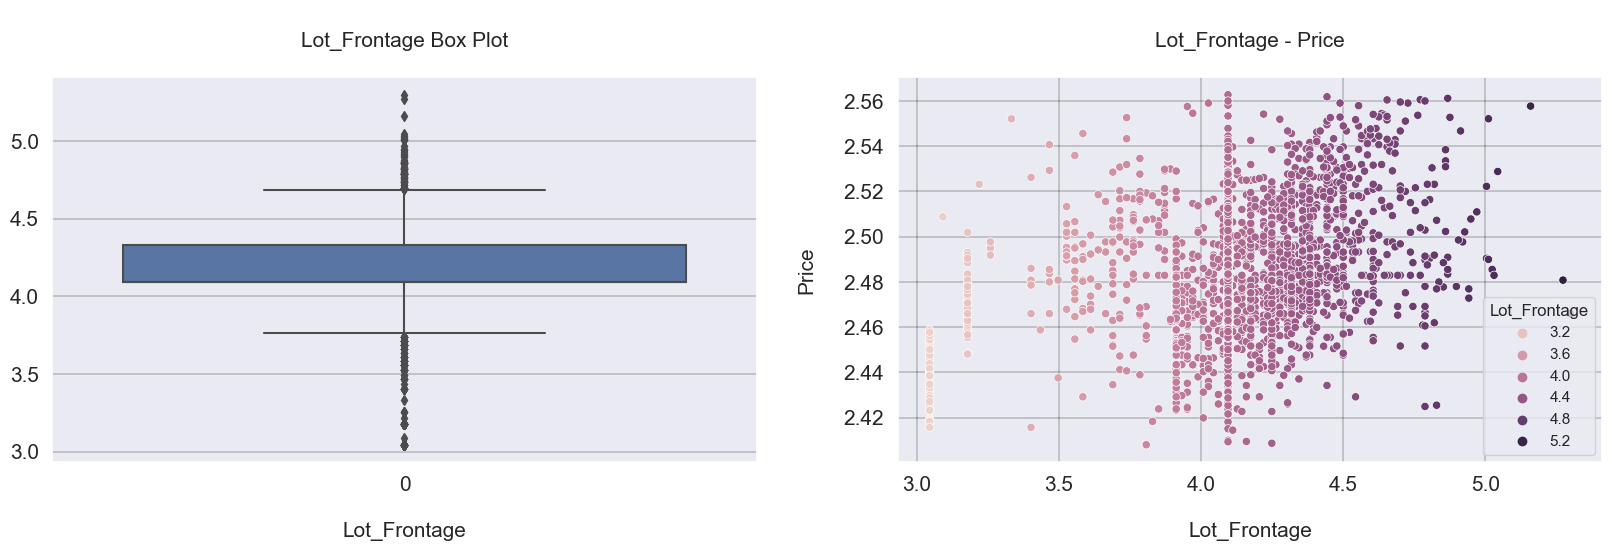

In [53]:
Numerical_Plot("Lot_Frontage")

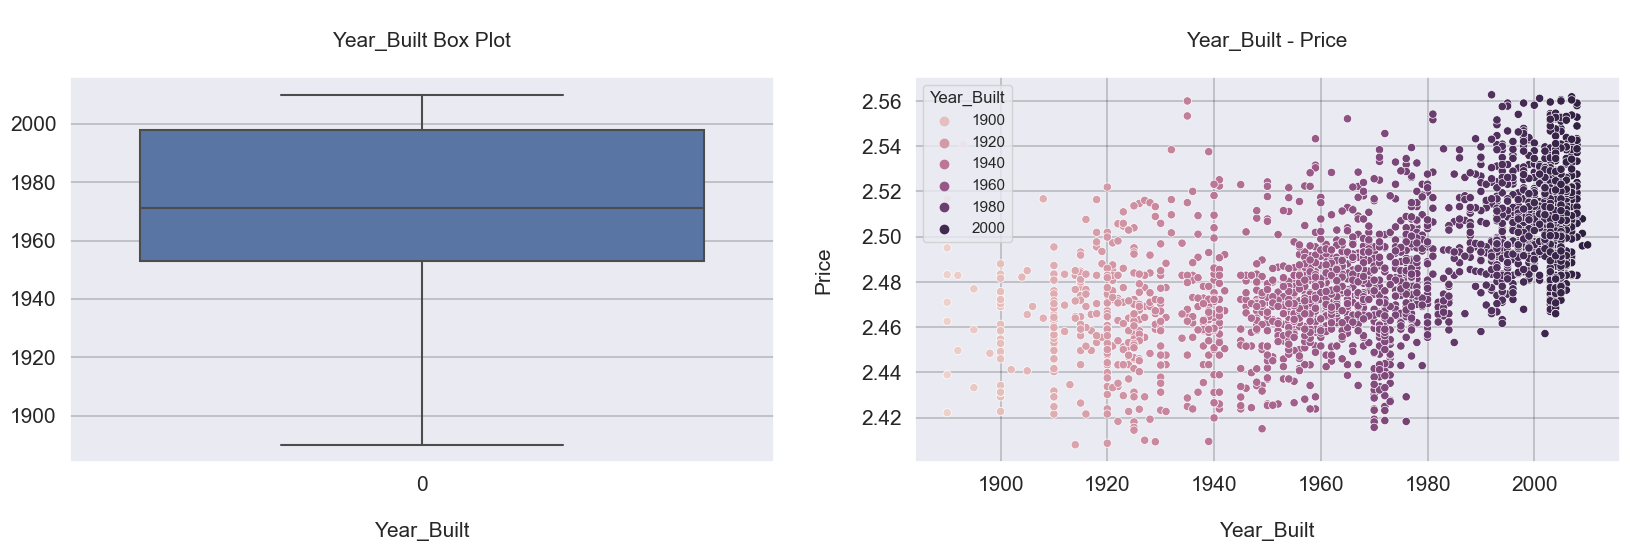

In [54]:
Numerical_Plot("Year_Built")

### normal distribution of the data after treating the outliers

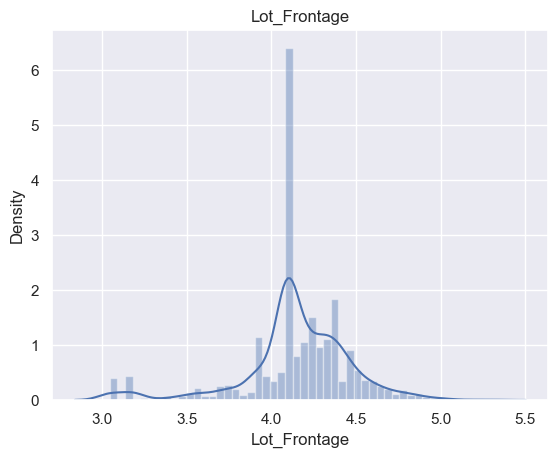

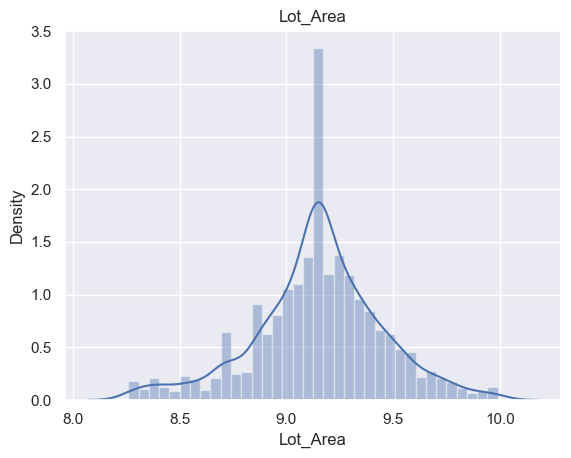

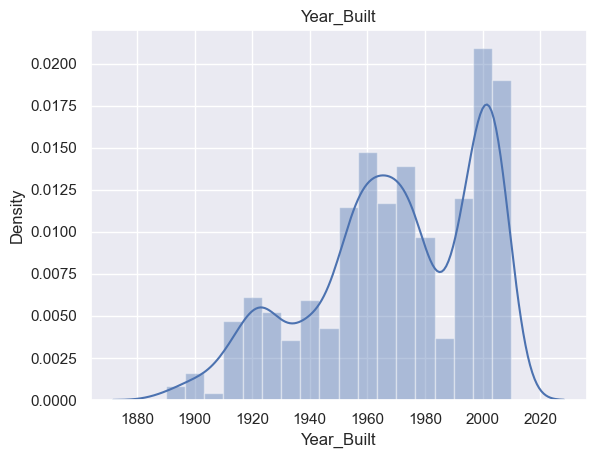

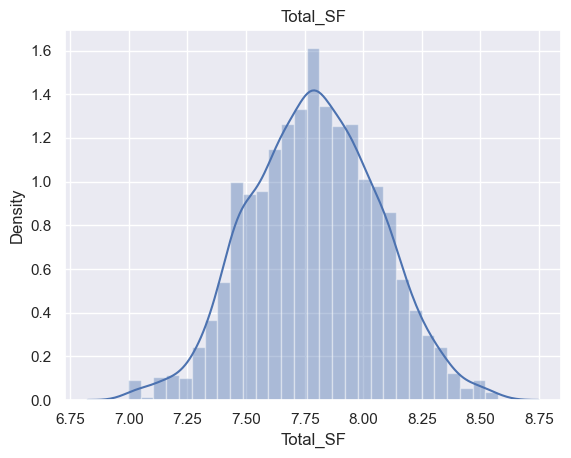

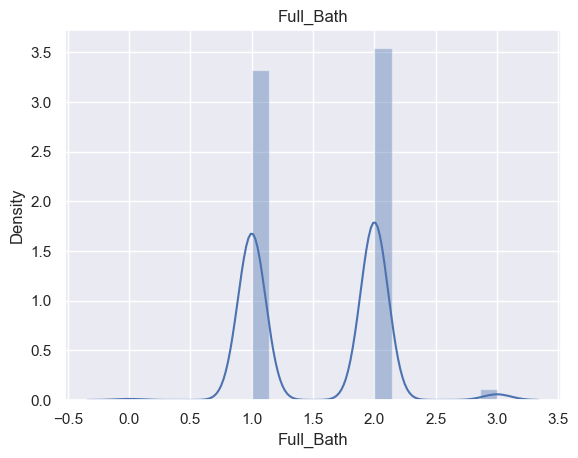

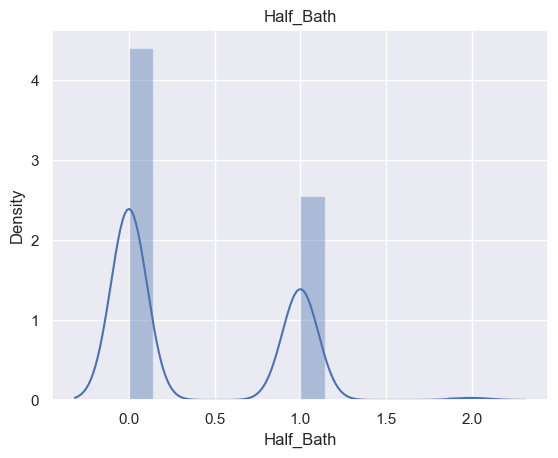

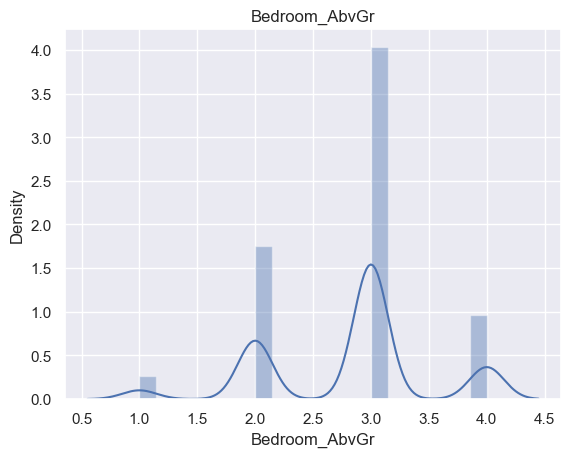

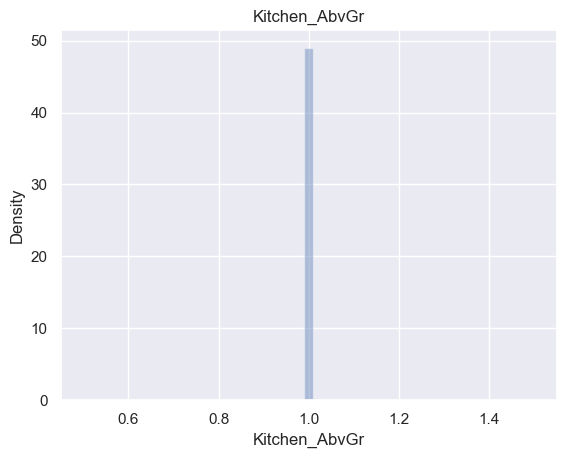

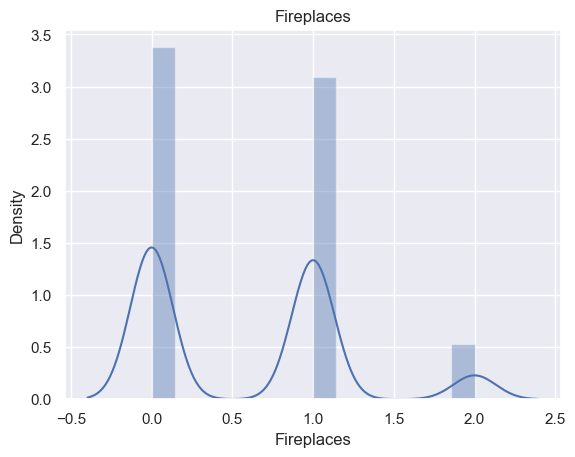

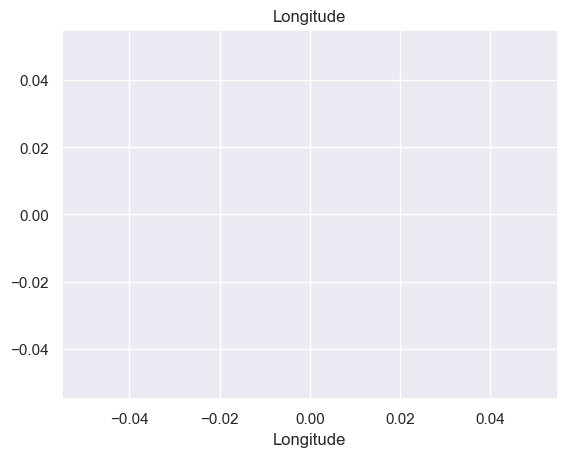

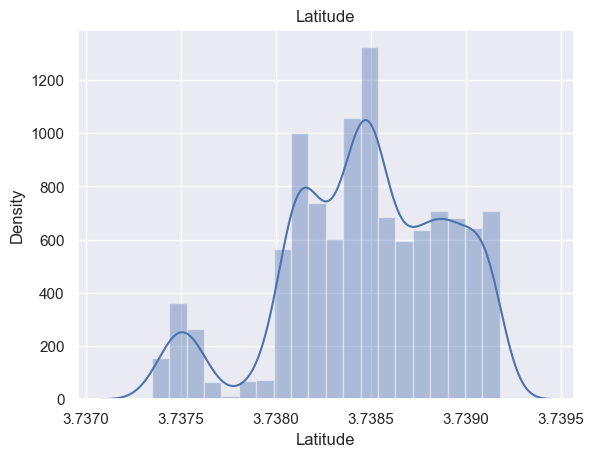

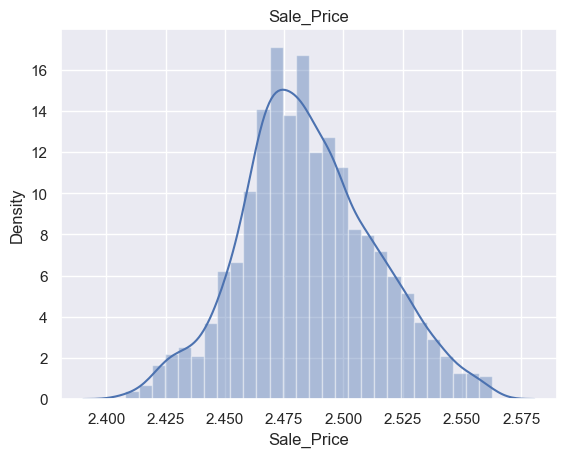

In [55]:
for feature in Num_colms:
  #       print(feature)
        sns.distplot(data_after_EDA[feature])
        plt.title(feature)
        plt.show()

# Checking for multicollinearity

In [56]:
data_after_EDA.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style  Overall_Cond  Year_Built  \
0      4.948760  9.144201    OneFam   One_Story             4        1960   
1      4.382027  9.360655    OneFam   One_Story             5        1961   
2      4.394449  9.565704    OneFam   One_Story             5        1958   
3      4.532599  9.320091    OneFam   One_Story             4        1968   
4      4.304065  9.534595    OneFam   Two_Story             4        1997   

   Exter_Cond  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  \
0           2          1          0              3              1           2   
1           2          1          0              2              1           0   
2           2          1          1              3              1           0   
3           2          2          1              3              1           2   
4           2          2          1              3              1           1   

   Longitude  Latitude  Sale_Price  Total_SF  
0        NaN  3.738955    2.507841  7.914252  
1        NaN  3.738931    2.447699  7.483244  
2        NaN  3.738923    2.489500  7.885329  
3        NaN  3.738889    2.518093  8.347590  
4        NaN  3.739119    2.497679  7.846590

In [57]:
data_after_EDA = pd.get_dummies(data_after_EDA,columns = ['Bldg_Type', 'House_Style'] ,drop_first=True)
data_after_EDA.head()


Lot_Frontage  Lot_Area  Overall_Cond  Year_Built  Exter_Cond  Full_Bath  \
0      4.948760  9.144201             4        1960           2          1   
1      4.382027  9.360655             5        1961           2          1   
2      4.394449  9.565704             5        1958           2          1   
3      4.532599  9.320091             4        1968           2          2   
4      4.304065  9.534595             4        1997           2          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  ...  Bldg_Type_Twnhs  \
0          0              3              1           2  ...                0   
1          0              2              1           0  ...                0   
2          1              3              1           0  ...                0   
3          1              3              1           2  ...                0   
4          1              3              1           1  ...                0   

   Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  House_Style_One_and_Half_Fin  \
0                 0                   0                             0   
1                 0                   0                             0   
2                 0                   0                             0   
3                 0                   0                             0   
4                 0                   0                             0   

   House_Style_One_and_Half_Unf  House_Style_SFoyer  House_Style_SLvl  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   

   House_Style_Two_Story  House_Style_Two_and_Half_Fin  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      0                             0   
4                      1                             0   

   House_Style_Two_and_Half_Unf  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 25 columns]

In [58]:
data_after_EDA.describe(include = 'all')

Lot_Frontage     Lot_Area  Overall_Cond   Year_Built   Exter_Cond  \
count   2413.000000  2413.000000   2413.000000  2413.000000  2413.000000   
mean       4.149904     9.148033      4.630336  1969.814339     2.095731   
std        0.325157     0.302234      1.163332    28.914273     0.380323   
min        3.044522     8.260751      0.000000  1890.000000     0.000000   
25%        4.094345     8.995165      4.000000  1953.000000     2.000000   
50%        4.094345     9.144201      4.000000  1971.000000     2.000000   
75%        4.330733     9.323490      5.000000  1998.000000     2.000000   
max        5.298317     9.988747      8.000000  2010.000000     4.000000   

         Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr   Fireplaces  \
count  2413.000000  2413.000000    2413.000000         2413.0  2413.000000   
mean      1.535847     0.377953       2.812267            1.0     0.593452   
std       0.535687     0.498467       0.707680            0.0     0.626983   
min       0.000000     0.000000       1.000000            1.0     0.000000   
25%       1.000000     0.000000       2.000000            1.0     0.000000   
50%       2.000000     0.000000       3.000000            1.0     1.000000   
75%       2.000000     1.000000       3.000000            1.0     1.000000   
max       3.000000     2.000000       4.000000            1.0     2.000000   

       ...  Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
count  ...      2413.000000       2413.000000         2413.000000   
mean   ...         0.038541          0.077911            0.021550   
std    ...         0.192539          0.268088            0.145239   
min    ...         0.000000          0.000000            0.000000   
25%    ...         0.000000          0.000000            0.000000   
50%    ...         0.000000          0.000000            0.000000   
75%    ...         0.000000          0.000000            0.000000   
max    ...         1.000000          1.000000            1.000000   

       House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
count                   2413.000000                   2413.000000   
mean                       0.111894                      0.007874   
std                        0.315301                      0.088404   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        0.000000                      0.000000   
max                        1.000000                      1.000000   

       House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
count         2413.000000       2413.000000            2413.000000   
mean             0.027352          0.047659               0.300870   
std              0.163140          0.213087               0.458731   
min              0.000000          0.000000               0.000000   
25%              0.000000          0.000000               0.000000   
50%              0.000000          0.000000               0.000000   
75%              0.000000          0.000000               1.000000   
max              1.000000          1.000000               1.000000   

       House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  
count                   2413.000000                   2413.000000  
mean                       0.002487                      0.009117  
std                        0.049813                      0.095068  
min                        0.000000                      0.000000  
25%                        0.000000                      0.000000  
50%                        0.000000                      0.000000  
75%                        0.000000                      0.000000  
max                        1.000000                      1.000000  

[8 rows x 25 columns]

In [59]:
data_after_EDA.drop('Longitude', axis = 1, inplace = True)
data_after_EDA.head()

Lot_Frontage  Lot_Area  Overall_Cond  Year_Built  Exter_Cond  Full_Bath  \
0      4.948760  9.144201             4        1960           2          1   
1      4.382027  9.360655             5        1961           2          1   
2      4.394449  9.565704             5        1958           2          1   
3      4.532599  9.320091             4        1968           2          2   
4      4.304065  9.534595             4        1997           2          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  ...  Bldg_Type_Twnhs  \
0          0              3              1           2  ...                0   
1          0              2              1           0  ...                0   
2          1              3              1           0  ...                0   
3          1              3              1           2  ...                0   
4          1              3              1           1  ...                0   

   Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  House_Style_One_and_Half_Fin  \
0                 0                   0                             0   
1                 0                   0                             0   
2                 0                   0                             0   
3                 0                   0                             0   
4                 0                   0                             0   

   House_Style_One_and_Half_Unf  House_Style_SFoyer  House_Style_SLvl  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   

   House_Style_Two_Story  House_Style_Two_and_Half_Fin  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      0                             0   
4                      1                             0   

   House_Style_Two_and_Half_Unf  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 24 columns]

## Assumption test  1 : Multicollinearity Test

In [60]:
vif = pd.DataFrame()
vif['VIF'] = [sms.variance_inflation_factor(data_after_EDA.values, i).round(2) for i in range (data_after_EDA.shape[1])]
vif['Variables'] = data_after_EDA.columns
print((vif))

            VIF                     Variables
0          2.30                  Lot_Frontage
1          1.41                      Lot_Area
2          1.55                  Overall_Cond
3          3.00                    Year_Built
4          1.22                    Exter_Cond
5          2.29                     Full_Bath
6          2.18                     Half_Bath
7          1.72                 Bedroom_AbvGr
8   85077419.68                 Kitchen_AbvGr
9          1.43                    Fireplaces
10         1.12                      Latitude
11         4.47                    Sale_Price
12         3.46                      Total_SF
13         5.30              Bldg_Type_OneFam
14         3.13               Bldg_Type_Twnhs
15         4.36              Bldg_Type_TwnhsE
16         1.73            Bldg_Type_TwoFmCon
17         1.55  House_Style_One_and_Half_Fin
18         1.04  House_Style_One_and_Half_Unf
19         1.13            House_Style_SFoyer
20         1.13              House

# Dropping Kitchen_AbvGr since it has high variance inflation factors

In [61]:
data_after_EDA.drop('Kitchen_AbvGr', axis = 1, inplace = True)
data_after_EDA.head()

Lot_Frontage  Lot_Area  Overall_Cond  Year_Built  Exter_Cond  Full_Bath  \
0      4.948760  9.144201             4        1960           2          1   
1      4.382027  9.360655             5        1961           2          1   
2      4.394449  9.565704             5        1958           2          1   
3      4.532599  9.320091             4        1968           2          2   
4      4.304065  9.534595             4        1997           2          2   

   Half_Bath  Bedroom_AbvGr  Fireplaces  Latitude  ...  Bldg_Type_Twnhs  \
0          0              3           2  3.738955  ...                0   
1          0              2           0  3.738931  ...                0   
2          1              3           0  3.738923  ...                0   
3          1              3           2  3.738889  ...                0   
4          1              3           1  3.739119  ...                0   

   Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  House_Style_One_and_Half_Fin  \
0                 0                   0                             0   
1                 0                   0                             0   
2                 0                   0                             0   
3                 0                   0                             0   
4                 0                   0                             0   

   House_Style_One_and_Half_Unf  House_Style_SFoyer  House_Style_SLvl  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   

   House_Style_Two_Story  House_Style_Two_and_Half_Fin  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      0                             0   
4                      1                             0   

   House_Style_Two_and_Half_Unf  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 23 columns]

In [62]:
data_after_EDA.describe()

Lot_Frontage     Lot_Area  Overall_Cond   Year_Built   Exter_Cond  \
count   2413.000000  2413.000000   2413.000000  2413.000000  2413.000000   
mean       4.149904     9.148033      4.630336  1969.814339     2.095731   
std        0.325157     0.302234      1.163332    28.914273     0.380323   
min        3.044522     8.260751      0.000000  1890.000000     0.000000   
25%        4.094345     8.995165      4.000000  1953.000000     2.000000   
50%        4.094345     9.144201      4.000000  1971.000000     2.000000   
75%        4.330733     9.323490      5.000000  1998.000000     2.000000   
max        5.298317     9.988747      8.000000  2010.000000     4.000000   

         Full_Bath    Half_Bath  Bedroom_AbvGr   Fireplaces     Latitude  ...  \
count  2413.000000  2413.000000    2413.000000  2413.000000  2413.000000  ...   
mean      1.535847     0.377953       2.812267     0.593452     3.738472  ...   
std       0.535687     0.498467       0.707680     0.626983     0.000429  ...   
min       0.000000     0.000000       1.000000     0.000000     3.737348  ...   
25%       1.000000     0.000000       2.000000     0.000000     3.738183  ...   
50%       2.000000     0.000000       3.000000     1.000000     3.738492  ...   
75%       2.000000     1.000000       3.000000     1.000000     3.738812  ...   
max       3.000000     2.000000       4.000000     2.000000     3.739178  ...   

       Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
count      2413.000000       2413.000000         2413.000000   
mean          0.038541          0.077911            0.021550   
std           0.192539          0.268088            0.145239   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          0.000000            0.000000   
75%           0.000000          0.000000            0.000000   
max           1.000000          1.000000            1.000000   

       House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
count                   2413.000000                   2413.000000   
mean                       0.111894                      0.007874   
std                        0.315301                      0.088404   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        0.000000                      0.000000   
max                        1.000000                      1.000000   

       House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
count         2413.000000       2413.000000            2413.000000   
mean             0.027352          0.047659               0.300870   
std              0.163140          0.213087               0.458731   
min              0.000000          0.000000               0.000000   
25%              0.000000          0.000000               0.000000   
50%              0.000000          0.000000               0.000000   
75%              0.000000          0.000000               1.000000   
max              1.000000          1.000000               1.000000   

       House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  
count                   2413.000000                   2413.000000  
mean                       0.002487                      0.009117  
std                        0.049813                      0.095068  
min                        0.000000                      0.000000  
25%                        0.000000                      0.000000  
50%                        0.000000                      0.000000  
75%                        0.000000                      0.000000  
max                        1.000000                      1.000000  

[8 rows x 23 columns]

# Splitting the data into Train and Test

In [63]:
y = data_after_EDA['Sale_Price']
X = data_after_EDA.drop('Sale_Price', axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=23106786, test_size=0.20, shuffle=True)

In [64]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     296.9
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:35:54   Log-Likelihood:                 5584.6
No. Observations:                1930   AIC:                        -1.112e+04
Df Residuals:                    1907   BIC:                        -1.100e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

so we can see there are variable with P-value > 0.05 so we can drop the variables. 

## Checking p-values and dropping insignificant values

In [65]:
from sklearn.model_selection import train_test_split 
y = data_after_EDA['Sale_Price']
X = data_after_EDA.drop(['Sale_Price','Exter_Cond', 'Latitude', 'House_Style_One_and_Half_Unf', 'House_Style_Two_and_Half_Fin','House_Style_One_and_Half_Fin','House_Style_Two_and_Half_Unf'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=23106786, test_size=0.20, shuffle=True)

In [66]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     407.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:35:54   Log-Likelihood:                 5581.0
No. Observations:                1930   AIC:                        -1.113e+04
Df Residuals:                    1913   BIC:                        -1.103e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.33

So, the model before testing have 77.1% of prediction 
accuracy with high value of F-stats – 407. Durbin-Watson 
value is around 2 which is 1.973, that indicates there is no 
autocorrelation. 

By the test, Durbin - Waston is 1.973 which indicates there is no autocolleration of error 

In [67]:
df = pd.DataFrame()
x1 = sm.add_constant(X_test)
df['pred'] = results.predict(x1)

In [68]:
df['actual'] = y_test.values
df['difference'] = df['actual'] - df['pred']
df['percent_diff'] = ((abs(df['difference'])/((df['actual']+df['pred'])/2))*100)
df.reset_index()

index      pred    actual  difference  percent_diff
0     1205  2.499641  2.515059    0.015418      0.614922
1       58  2.496907  2.507917    0.011010      0.439974
2      215  2.517275  2.508969   -0.008306      0.330489
3     1090  2.463069  2.471672    0.008603      0.348672
4      635  2.494269  2.510994    0.016725      0.668302
..     ...       ...       ...         ...           ...
478   2287  2.489925  2.497722    0.007798      0.312684
479    173  2.468495  2.471307    0.002812      0.113832
480   2294  2.470089  2.481368    0.011279      0.455574
481   1903  2.476102  2.468574   -0.007529      0.304526
482   1969  2.486970  2.488040    0.001070      0.043009

[483 rows x 5 columns]

In [69]:
df.describe()

pred      actual  difference  percent_diff
count  483.000000  483.000000  483.000000    483.000000
mean     2.486359    2.485398   -0.000961      0.366506
std      0.024402    0.027583    0.012884      0.367873
min      2.429974    2.410056   -0.066136      0.000832
25%      2.468446    2.466003   -0.007152      0.116952
50%      2.485934    2.482960   -0.000817      0.270355
75%      2.504990    2.501934    0.006084      0.488829
max      2.549353    2.561856    0.052985      2.628572

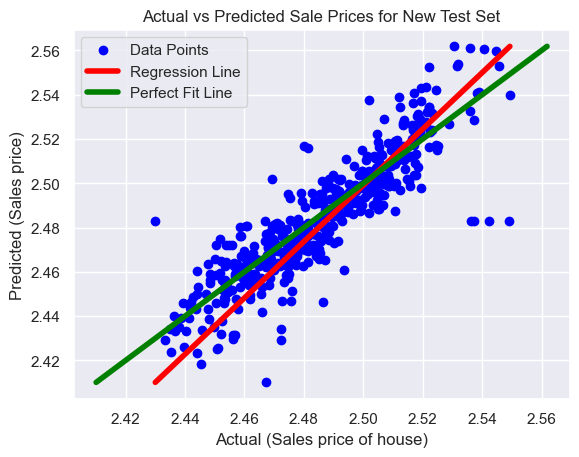

In [70]:
plt.scatter(df['pred'],df['actual'],color='blue', label='Data Points')
plt.plot([df['pred'].min(),df['pred'].max()],[df['actual'].min(),df['actual'].max()], 'k', lw=4, color = 'red', label='Regression Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=4, color = 'green', label='Perfect Fit Line')
plt.xlabel('Actual (Sales price of house)')
plt.ylabel('Predicted (Sales price)')
plt.title('Actual vs Predicted Sale Prices for New Test Set')
plt.legend()
plt.show()

## Assumption 3 : Normality of residual.

<Axes: xlabel='difference', ylabel='Density'>

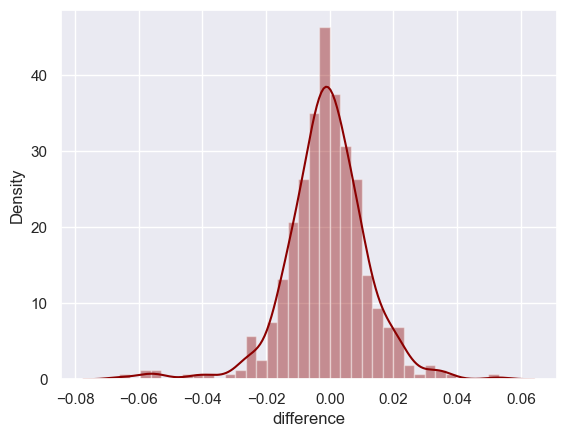

In [71]:
sns.distplot(df['difference'], color= "darkred")

## Assumptions 4 : Homoscedasticity

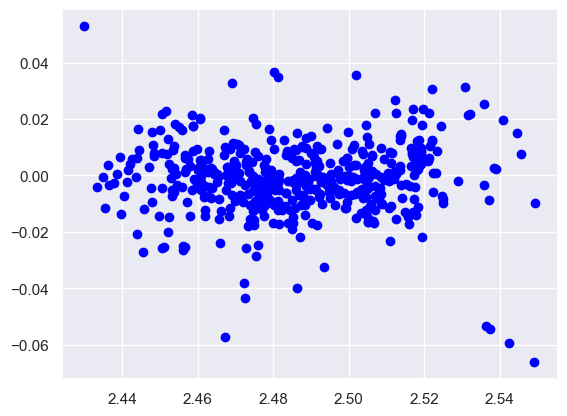

In [72]:
plt.scatter(df['pred'],df['difference'],color = "blue")

## Assumptions 5 : No autocorrelation of residuals:

We use Durbin-Watson test to check is there any autocorrelation of residuals.

In [73]:
residual = results.resid

In [74]:
dw = durbin_watson(residual)
print(f'The Durbin-watson value is :{dw}')

The Durbin-watson value is :1.9733605451583933


In [75]:
mae = metrics.mean_absolute_error(df['pred'],df['actual'])
print(f"Mean Absolute Error     : {mae:.2f}")

mse = mean_squared_error(df['pred'],df['actual'])
print(f"Mean Squared Error      : {mse:.2f}")

rmse = np.sqrt(metrics.mean_squared_error(df['pred'],df['actual']))
print(f"Root Mean Squared Error : {rmse:.2f}")

rs = metrics.r2_score(df['pred'],df['actual'])
print(f"R2 Score                : {rs:.2f}")

Mean Absolute Error     : 0.01
Mean Squared Error      : 0.00
Root Mean Squared Error : 0.01
R2 Score                : 0.72


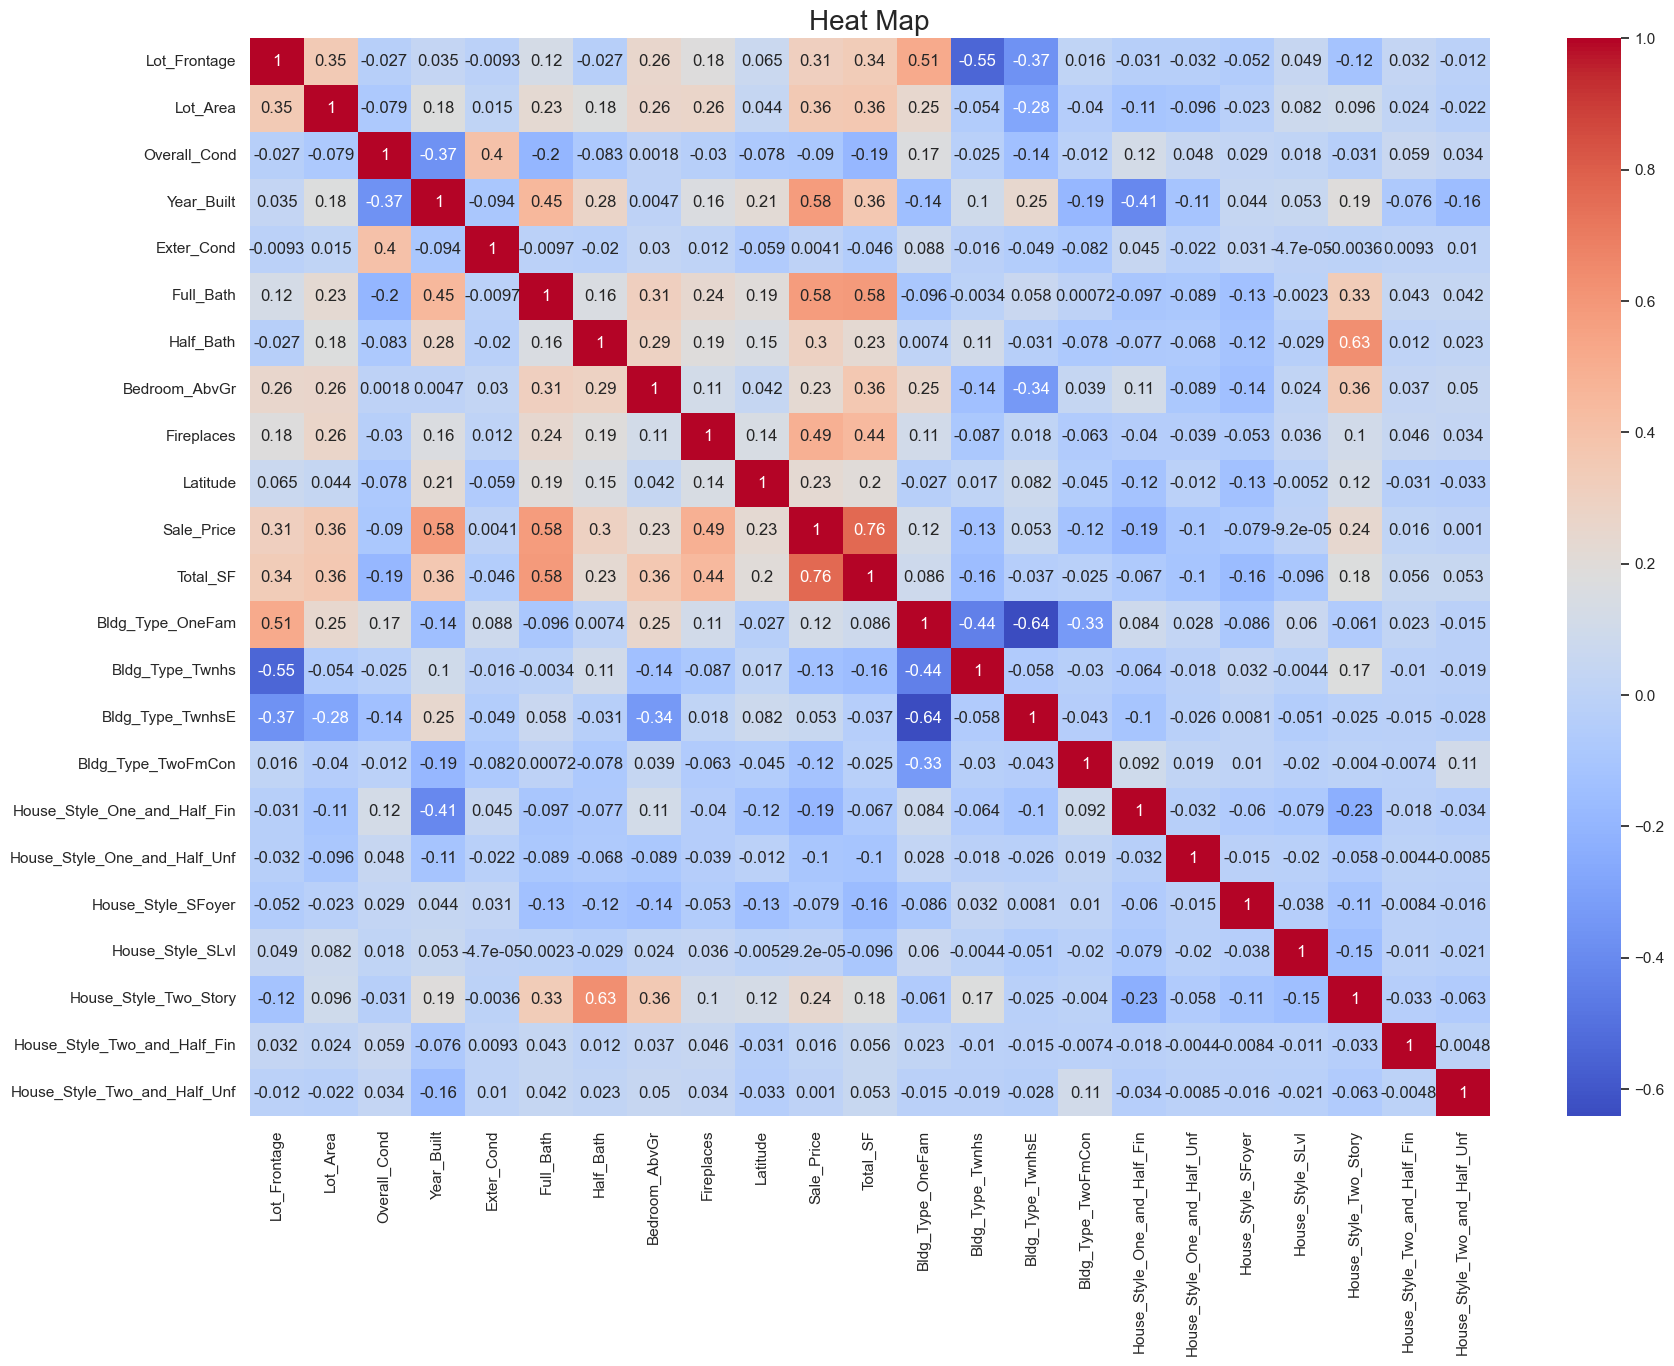

In [76]:
plt.figure(figsize=(20, 14))
sns.heatmap(data_after_EDA.corr(), annot=True ,cmap='coolwarm')
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [77]:
Sale_price_Skewness = stats.skew(data_after_EDA['Sale_Price'])
print(f'The Skewness of Sale Price with cleaned data is: {Sale_price_Skewness}' )

The Skewness of Sale Price with cleaned data is: 0.17859903286994483


Skewness is 0.1785 which is close the 0, we can say that our data is symmetrical distributed

In [78]:
Sale_price_Skewness = stats.kurtosis(data_after_EDA['Sale_Price'])
print(f'The kurtosis of Sale Price with cleaned data is: {Sale_price_Skewness}' )

The kurtosis of Sale Price with cleaned data is: -0.11941700256721788


##### Our goal of investigating the features influencing the housing prices using a multiple linear regression (MLR) model has been achieved. 
#### With the help of Gauss-Markov assumptions , we have successfully tested the data with all assumptions, such as no multicollinearity, Normality of residual, Homoscedasticity, No autocorrelation of residuals and a linear relationship between independent and dependent variables.
#### By splitting the data into train and test data, we have a multiple regression model that predicts housing sale price with 77.1% of accuracy. We were able to contribute a study that can demonstrate the factors that affects the sale price in the housing industry. 